# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

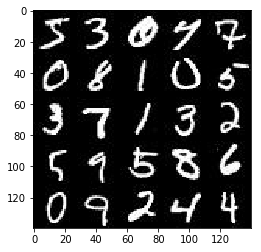

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

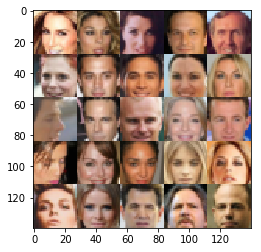

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))


# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

D:\Development\Anaconda\envs\dog-windows-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.7.0


D:\Development\Anaconda\envs\dog-windows-gpu\lib\site-packages\ipykernel\__main__.py:15: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [23]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0 # RELU
    dropout_rate = 0.1    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 32, 5, strides = 2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(alpha*x1, x1)
        #14x14x32
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides = 2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        #7x7x64

        x3 = tf.layers.conv2d(relu2, 128, 5, strides = 1, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        #7x7x128
                
        flat = tf.reshape(relu3, (-1, 7*7*128))
        flat_with_dropout = tf.layers.dropout(flat,dropout_rate)
        
        logits = tf.layers.dense(flat_with_dropout,1,kernel_initializer=tf.contrib.layers.xavier_initializer())
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [24]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2 #Leaky RELU factor
    dropout_rate = 0.1
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, z.shape[1],kernel_initializer=tf.contrib.layers.xavier_initializer())

        #Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1 )#Leaky RELU
        #512

        #x2 = tf.layers.conv2d_transpose(x1, 512, 5, strides=1, padding='same')
        #x2 = tf.layers.batch_normalization(x2, training=is_train)
        #x2 = tf.maximum(alpha*x2, x2)#Leaky RELU
        #512

        x3 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)#Leaky RELU
        x3 = tf.layers.dropout(x3,dropout_rate)
        #256

        x4 = tf.layers.conv2d_transpose(x3, 128, 5, strides=1, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha*x4, x4)#Leaky RELU
        x4 = tf.layers.dropout(x4,dropout_rate)        
        #128

        x5 = tf.layers.conv2d_transpose(x4, 32, 5, strides=1, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = tf.maximum(alpha*x5, x5)#Leaky RELU
        x5 = tf.layers.dropout(x5,dropout_rate)        
        #64

        x6 = tf.layers.conv2d_transpose(x5, 32, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        x6 = tf.layers.batch_normalization(x6, training=is_train)
        x6 = tf.maximum(alpha*x6, x6)#Leaky RELU
        x6 = tf.layers.dropout(x6,dropout_rate)        
        #32

        #Output layer , 28x28x3
        logits = tf.layers.conv2d_transpose(x6, out_channel_dim, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())

        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [25]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    #Label Smoothing factor - To prevent discriminator from being too strong 
    smooth = 0.1
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [26]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [27]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [28]:
import matplotlib.pyplot as plt

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print_every = 10
    show_every=100
    steps = 0
    d_loss_vec = []
    g_loss_vec = []
    
    
    inputs_real, inputs_z, learning_rate_var = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_train_opt, g_train_opt  = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    config = tf.ConfigProto()
    config.gpu_options.allocator_type = 'BFC'
    config.gpu_options.allow_growth = True
    config.gpu_options.per_process_gpu_memory_fraction = 0.9 # This is to make sure that the GPU does not run out of Memory.

    
    with tf.Session(config=config) as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images * 2 #Scale images between -1 to 1 to match tanh input from generator.
                steps += 1
                # TODO: Train Model
                # Run optimizers                
                batch_z = np.random.normal(0, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                    train_loss_g = g_loss.eval({inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    d_loss_vec.append(train_loss_d)
                    g_loss_vec.append(train_loss_g)    
                    
                if steps % show_every == 0:                    
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
                    
    discriminator_loss, = plt.plot(d_loss_vec, color='b', label='Discriminator loss')
    generator_loss, = plt.plot(g_loss_vec, color='r', label='Generator loss')
    plt.legend(handles=[ discriminator_loss, generator_loss])
    plt.show()

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Starting --  2018-06-06 07:31:02.460923
Epoch 1/2... Discriminator Loss: 4.4546... Generator Loss: 0.0551
Epoch 1/2... Discriminator Loss: 4.9544... Generator Loss: 0.0523
Epoch 1/2... Discriminator Loss: 3.2890... Generator Loss: 0.0856
Epoch 1/2... Discriminator Loss: 2.8630... Generator Loss: 0.1099
Epoch 1/2... Discriminator Loss: 2.1337... Generator Loss: 0.2946
Epoch 1/2... Discriminator Loss: 2.4876... Generator Loss: 0.1830
Epoch 1/2... Discriminator Loss: 2.9882... Generator Loss: 0.0930
Epoch 1/2... Discriminator Loss: 2.5438... Generator Loss: 0.1372
Epoch 1/2... Discriminator Loss: 2.7946... Generator Loss: 0.1088
Epoch 1/2... Discriminator Loss: 2.6570... Generator Loss: 0.1247


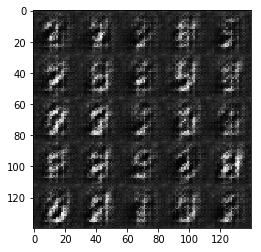

Epoch 1/2... Discriminator Loss: 2.2567... Generator Loss: 0.2248
Epoch 1/2... Discriminator Loss: 1.9046... Generator Loss: 0.4465
Epoch 1/2... Discriminator Loss: 2.2993... Generator Loss: 0.2321
Epoch 1/2... Discriminator Loss: 3.1686... Generator Loss: 0.0700
Epoch 1/2... Discriminator Loss: 2.3205... Generator Loss: 0.2714
Epoch 1/2... Discriminator Loss: 2.7891... Generator Loss: 0.1079
Epoch 1/2... Discriminator Loss: 2.5219... Generator Loss: 0.1495
Epoch 1/2... Discriminator Loss: 2.6701... Generator Loss: 0.1207
Epoch 1/2... Discriminator Loss: 1.7024... Generator Loss: 0.5931
Epoch 1/2... Discriminator Loss: 2.4935... Generator Loss: 0.1392


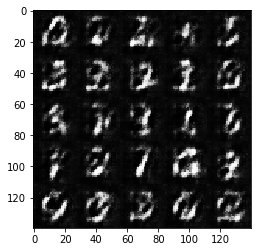

Epoch 1/2... Discriminator Loss: 2.1241... Generator Loss: 0.5765
Epoch 1/2... Discriminator Loss: 2.1358... Generator Loss: 0.2285
Epoch 1/2... Discriminator Loss: 1.7989... Generator Loss: 0.6094
Epoch 1/2... Discriminator Loss: 2.2359... Generator Loss: 0.2218
Epoch 1/2... Discriminator Loss: 2.2744... Generator Loss: 0.1978
Epoch 1/2... Discriminator Loss: 2.2096... Generator Loss: 0.2271
Epoch 1/2... Discriminator Loss: 1.9029... Generator Loss: 0.3132
Epoch 1/2... Discriminator Loss: 2.1469... Generator Loss: 0.2475
Epoch 1/2... Discriminator Loss: 2.6789... Generator Loss: 0.1256
Epoch 1/2... Discriminator Loss: 2.3494... Generator Loss: 0.1715


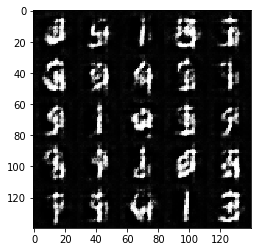

Epoch 1/2... Discriminator Loss: 2.0448... Generator Loss: 0.2421
Epoch 1/2... Discriminator Loss: 2.0433... Generator Loss: 0.2837
Epoch 1/2... Discriminator Loss: 2.1326... Generator Loss: 0.3176
Epoch 1/2... Discriminator Loss: 2.6534... Generator Loss: 0.1279
Epoch 1/2... Discriminator Loss: 2.2634... Generator Loss: 0.2246
Epoch 1/2... Discriminator Loss: 1.8050... Generator Loss: 0.3874
Epoch 1/2... Discriminator Loss: 1.9494... Generator Loss: 0.3349
Epoch 1/2... Discriminator Loss: 2.4478... Generator Loss: 0.1551
Epoch 1/2... Discriminator Loss: 1.8496... Generator Loss: 0.3519
Epoch 1/2... Discriminator Loss: 2.3297... Generator Loss: 0.1745


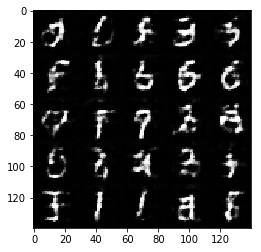

Epoch 1/2... Discriminator Loss: 1.8197... Generator Loss: 0.4530
Epoch 1/2... Discriminator Loss: 1.8877... Generator Loss: 0.5134
Epoch 1/2... Discriminator Loss: 1.9749... Generator Loss: 0.3716
Epoch 1/2... Discriminator Loss: 2.1208... Generator Loss: 0.3497
Epoch 1/2... Discriminator Loss: 1.8212... Generator Loss: 0.4489
Epoch 1/2... Discriminator Loss: 1.8346... Generator Loss: 0.4925
Epoch 1/2... Discriminator Loss: 1.9337... Generator Loss: 0.3173
Epoch 1/2... Discriminator Loss: 2.0653... Generator Loss: 0.2878
Epoch 1/2... Discriminator Loss: 2.5542... Generator Loss: 0.1367
Epoch 1/2... Discriminator Loss: 1.6034... Generator Loss: 0.5605


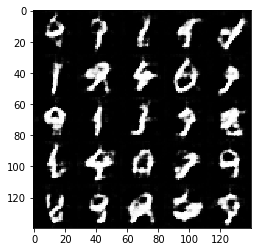

Epoch 1/2... Discriminator Loss: 2.0980... Generator Loss: 0.2195
Epoch 1/2... Discriminator Loss: 1.7991... Generator Loss: 0.4097
Epoch 1/2... Discriminator Loss: 1.8119... Generator Loss: 0.3518
Epoch 1/2... Discriminator Loss: 2.0080... Generator Loss: 0.2722
Epoch 1/2... Discriminator Loss: 1.5808... Generator Loss: 0.6356
Epoch 1/2... Discriminator Loss: 1.5570... Generator Loss: 0.9318
Epoch 1/2... Discriminator Loss: 1.9067... Generator Loss: 0.3060
Epoch 1/2... Discriminator Loss: 1.4628... Generator Loss: 0.6997
Epoch 1/2... Discriminator Loss: 1.6854... Generator Loss: 0.6131
Epoch 1/2... Discriminator Loss: 2.0603... Generator Loss: 0.2994


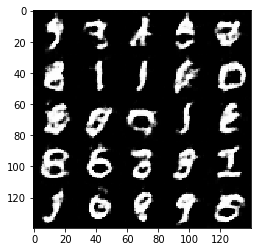

Epoch 1/2... Discriminator Loss: 2.4647... Generator Loss: 0.1550
Epoch 1/2... Discriminator Loss: 1.5019... Generator Loss: 0.5064
Epoch 1/2... Discriminator Loss: 1.6422... Generator Loss: 0.4657
Epoch 1/2... Discriminator Loss: 3.0325... Generator Loss: 0.0918
Epoch 1/2... Discriminator Loss: 1.8441... Generator Loss: 0.3190
Epoch 1/2... Discriminator Loss: 1.7721... Generator Loss: 0.3836
Epoch 1/2... Discriminator Loss: 1.7515... Generator Loss: 0.4521
Epoch 1/2... Discriminator Loss: 1.7063... Generator Loss: 0.4288
Epoch 1/2... Discriminator Loss: 2.2956... Generator Loss: 0.1890
Epoch 1/2... Discriminator Loss: 1.6932... Generator Loss: 0.4344


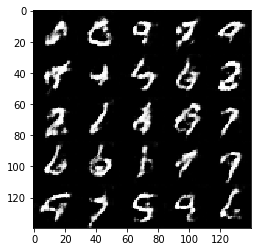

Epoch 1/2... Discriminator Loss: 2.5215... Generator Loss: 0.1414
Epoch 1/2... Discriminator Loss: 1.7087... Generator Loss: 0.3594
Epoch 1/2... Discriminator Loss: 1.9809... Generator Loss: 0.3071
Epoch 1/2... Discriminator Loss: 2.5109... Generator Loss: 0.1465
Epoch 1/2... Discriminator Loss: 1.8874... Generator Loss: 0.2919
Epoch 1/2... Discriminator Loss: 1.0219... Generator Loss: 1.1044
Epoch 1/2... Discriminator Loss: 1.6527... Generator Loss: 0.4093
Epoch 1/2... Discriminator Loss: 1.5535... Generator Loss: 0.6247
Epoch 1/2... Discriminator Loss: 1.7090... Generator Loss: 0.4374
Epoch 1/2... Discriminator Loss: 1.6404... Generator Loss: 0.7435


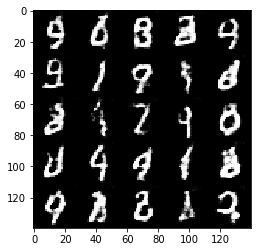

Epoch 1/2... Discriminator Loss: 1.6842... Generator Loss: 0.5681
Epoch 1/2... Discriminator Loss: 2.1098... Generator Loss: 0.2311
Epoch 1/2... Discriminator Loss: 2.2970... Generator Loss: 0.1862
Epoch 1/2... Discriminator Loss: 1.4644... Generator Loss: 0.5174
Epoch 1/2... Discriminator Loss: 1.5661... Generator Loss: 0.4456
Epoch 1/2... Discriminator Loss: 2.3507... Generator Loss: 0.1735
Epoch 1/2... Discriminator Loss: 1.8495... Generator Loss: 0.3391
Epoch 1/2... Discriminator Loss: 1.9302... Generator Loss: 0.3482
Epoch 1/2... Discriminator Loss: 2.0243... Generator Loss: 0.2726
Epoch 1/2... Discriminator Loss: 1.6739... Generator Loss: 0.3990


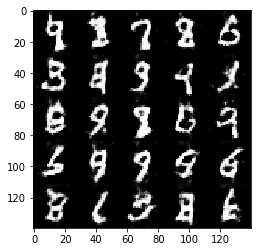

Epoch 1/2... Discriminator Loss: 1.5384... Generator Loss: 0.4991
Epoch 1/2... Discriminator Loss: 1.2826... Generator Loss: 0.7294
Epoch 1/2... Discriminator Loss: 2.3548... Generator Loss: 0.1844
Epoch 1/2... Discriminator Loss: 1.5918... Generator Loss: 0.4821
Epoch 1/2... Discriminator Loss: 1.5992... Generator Loss: 0.6137
Epoch 1/2... Discriminator Loss: 1.5066... Generator Loss: 0.7245
Epoch 1/2... Discriminator Loss: 1.8293... Generator Loss: 0.3536
Epoch 1/2... Discriminator Loss: 1.1443... Generator Loss: 0.9491
Epoch 1/2... Discriminator Loss: 1.7886... Generator Loss: 0.3577
Epoch 1/2... Discriminator Loss: 1.4916... Generator Loss: 0.4993


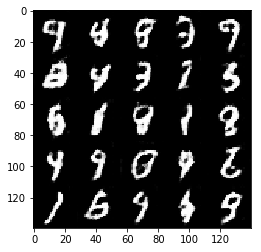

Epoch 1/2... Discriminator Loss: 1.5278... Generator Loss: 0.5687
Epoch 1/2... Discriminator Loss: 1.4444... Generator Loss: 0.9613
Epoch 1/2... Discriminator Loss: 2.4980... Generator Loss: 0.1555
Epoch 1/2... Discriminator Loss: 1.6036... Generator Loss: 0.4615
Epoch 1/2... Discriminator Loss: 1.3749... Generator Loss: 0.5387
Epoch 1/2... Discriminator Loss: 2.0838... Generator Loss: 0.2867
Epoch 1/2... Discriminator Loss: 1.2221... Generator Loss: 1.1542
Epoch 1/2... Discriminator Loss: 1.6299... Generator Loss: 0.4345
Epoch 1/2... Discriminator Loss: 1.3607... Generator Loss: 0.7699
Epoch 1/2... Discriminator Loss: 1.3006... Generator Loss: 0.6443


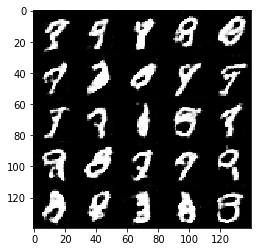

Epoch 1/2... Discriminator Loss: 1.6411... Generator Loss: 0.3977
Epoch 1/2... Discriminator Loss: 1.3292... Generator Loss: 0.7126
Epoch 1/2... Discriminator Loss: 1.8728... Generator Loss: 0.3572
Epoch 1/2... Discriminator Loss: 1.4965... Generator Loss: 0.6553
Epoch 1/2... Discriminator Loss: 1.9340... Generator Loss: 1.0930
Epoch 1/2... Discriminator Loss: 1.7171... Generator Loss: 0.4391
Epoch 1/2... Discriminator Loss: 1.6285... Generator Loss: 0.4469
Epoch 1/2... Discriminator Loss: 1.3637... Generator Loss: 0.6655
Epoch 1/2... Discriminator Loss: 1.1637... Generator Loss: 1.0163
Epoch 1/2... Discriminator Loss: 1.3318... Generator Loss: 0.7655


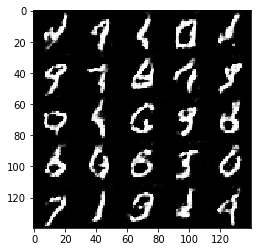

Epoch 1/2... Discriminator Loss: 1.3221... Generator Loss: 0.8760
Epoch 1/2... Discriminator Loss: 1.9914... Generator Loss: 0.2800
Epoch 1/2... Discriminator Loss: 1.8151... Generator Loss: 0.3511
Epoch 1/2... Discriminator Loss: 1.0885... Generator Loss: 0.8063
Epoch 1/2... Discriminator Loss: 1.5684... Generator Loss: 0.5180
Epoch 1/2... Discriminator Loss: 1.4553... Generator Loss: 0.5834
Epoch 1/2... Discriminator Loss: 1.1941... Generator Loss: 0.8625
Epoch 1/2... Discriminator Loss: 2.7803... Generator Loss: 0.1392
Epoch 1/2... Discriminator Loss: 1.4875... Generator Loss: 0.5829
Epoch 1/2... Discriminator Loss: 1.8090... Generator Loss: 0.3382


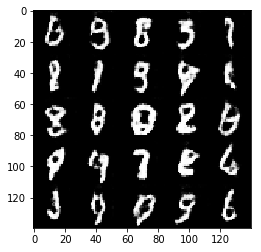

Epoch 1/2... Discriminator Loss: 1.1107... Generator Loss: 1.2331
Epoch 1/2... Discriminator Loss: 1.9925... Generator Loss: 0.2731
Epoch 1/2... Discriminator Loss: 1.5160... Generator Loss: 0.4687
Epoch 1/2... Discriminator Loss: 1.3375... Generator Loss: 0.7245
Epoch 1/2... Discriminator Loss: 2.1920... Generator Loss: 0.2469
Epoch 1/2... Discriminator Loss: 3.4839... Generator Loss: 0.0617
Epoch 1/2... Discriminator Loss: 1.6389... Generator Loss: 0.4765
Epoch 1/2... Discriminator Loss: 1.3094... Generator Loss: 1.6996
Epoch 1/2... Discriminator Loss: 1.4851... Generator Loss: 0.6086
Epoch 1/2... Discriminator Loss: 1.3376... Generator Loss: 0.5816


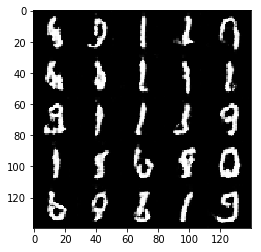

Epoch 1/2... Discriminator Loss: 1.5712... Generator Loss: 0.8649
Epoch 1/2... Discriminator Loss: 1.6257... Generator Loss: 1.0862
Epoch 1/2... Discriminator Loss: 1.6202... Generator Loss: 0.5790
Epoch 1/2... Discriminator Loss: 1.9536... Generator Loss: 0.3187
Epoch 1/2... Discriminator Loss: 1.8553... Generator Loss: 0.3529
Epoch 1/2... Discriminator Loss: 1.5531... Generator Loss: 0.4346
Epoch 1/2... Discriminator Loss: 1.5832... Generator Loss: 0.5031
Epoch 1/2... Discriminator Loss: 1.7128... Generator Loss: 0.3916
Epoch 1/2... Discriminator Loss: 1.4943... Generator Loss: 0.5236
Epoch 1/2... Discriminator Loss: 1.5287... Generator Loss: 0.4648


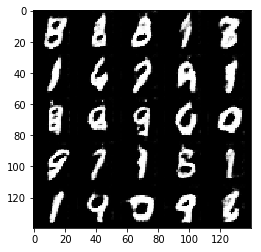

Epoch 1/2... Discriminator Loss: 3.5016... Generator Loss: 0.0605
Epoch 1/2... Discriminator Loss: 2.1906... Generator Loss: 0.2424
Epoch 1/2... Discriminator Loss: 1.3982... Generator Loss: 0.8412
Epoch 1/2... Discriminator Loss: 1.4432... Generator Loss: 0.5481
Epoch 1/2... Discriminator Loss: 1.4489... Generator Loss: 0.5305
Epoch 1/2... Discriminator Loss: 1.3279... Generator Loss: 0.6539
Epoch 1/2... Discriminator Loss: 1.7273... Generator Loss: 0.4183
Epoch 1/2... Discriminator Loss: 1.7700... Generator Loss: 0.3579
Epoch 1/2... Discriminator Loss: 1.0320... Generator Loss: 1.3605
Epoch 1/2... Discriminator Loss: 2.5200... Generator Loss: 0.1658


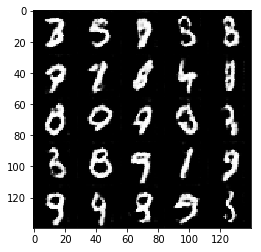

Epoch 1/2... Discriminator Loss: 1.8392... Generator Loss: 0.3767
Epoch 1/2... Discriminator Loss: 1.4718... Generator Loss: 0.4855
Epoch 1/2... Discriminator Loss: 2.2808... Generator Loss: 0.1860
Epoch 1/2... Discriminator Loss: 1.2870... Generator Loss: 0.7390
Epoch 1/2... Discriminator Loss: 1.2494... Generator Loss: 0.6656
Epoch 1/2... Discriminator Loss: 1.0235... Generator Loss: 0.9750
Epoch 1/2... Discriminator Loss: 2.0079... Generator Loss: 0.3172
Epoch 1/2... Discriminator Loss: 1.6078... Generator Loss: 0.4889
Epoch 1/2... Discriminator Loss: 3.3689... Generator Loss: 0.1000
Epoch 1/2... Discriminator Loss: 1.0780... Generator Loss: 1.2280


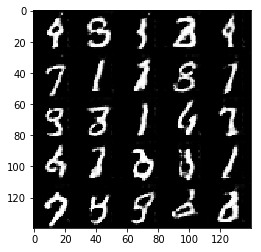

Epoch 1/2... Discriminator Loss: 1.8100... Generator Loss: 0.3598
Epoch 1/2... Discriminator Loss: 4.2765... Generator Loss: 0.0340
Epoch 1/2... Discriminator Loss: 2.3947... Generator Loss: 0.1839
Epoch 1/2... Discriminator Loss: 1.6144... Generator Loss: 0.5554
Epoch 1/2... Discriminator Loss: 1.3283... Generator Loss: 0.6526
Epoch 1/2... Discriminator Loss: 2.0896... Generator Loss: 0.2598
Epoch 1/2... Discriminator Loss: 1.9423... Generator Loss: 0.2903
Epoch 1/2... Discriminator Loss: 1.6474... Generator Loss: 0.4290
Epoch 1/2... Discriminator Loss: 1.4105... Generator Loss: 0.6379
Epoch 1/2... Discriminator Loss: 1.0319... Generator Loss: 0.9865


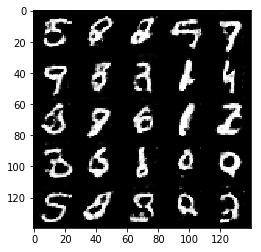

Epoch 1/2... Discriminator Loss: 1.8205... Generator Loss: 0.3612
Epoch 1/2... Discriminator Loss: 1.7437... Generator Loss: 0.3628
Epoch 1/2... Discriminator Loss: 2.2536... Generator Loss: 0.2046
Epoch 1/2... Discriminator Loss: 1.0610... Generator Loss: 0.8316
Epoch 1/2... Discriminator Loss: 1.6176... Generator Loss: 0.4715
Epoch 1/2... Discriminator Loss: 2.5520... Generator Loss: 0.1812
Epoch 1/2... Discriminator Loss: 1.8136... Generator Loss: 0.3847
Epoch 2/2... Discriminator Loss: 1.8934... Generator Loss: 0.3355
Epoch 2/2... Discriminator Loss: 1.5144... Generator Loss: 0.5133
Epoch 2/2... Discriminator Loss: 1.0344... Generator Loss: 1.1683


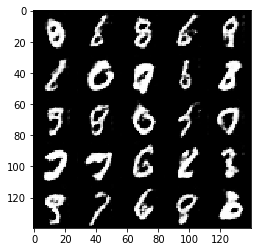

Epoch 2/2... Discriminator Loss: 1.3244... Generator Loss: 0.6384
Epoch 2/2... Discriminator Loss: 1.4684... Generator Loss: 0.5316
Epoch 2/2... Discriminator Loss: 1.8157... Generator Loss: 0.4340
Epoch 2/2... Discriminator Loss: 1.2212... Generator Loss: 0.7835
Epoch 2/2... Discriminator Loss: 1.3171... Generator Loss: 0.6024
Epoch 2/2... Discriminator Loss: 1.5717... Generator Loss: 0.4690
Epoch 2/2... Discriminator Loss: 1.8683... Generator Loss: 0.3524
Epoch 2/2... Discriminator Loss: 1.6243... Generator Loss: 0.5008
Epoch 2/2... Discriminator Loss: 1.1534... Generator Loss: 0.8480
Epoch 2/2... Discriminator Loss: 1.8332... Generator Loss: 0.3445


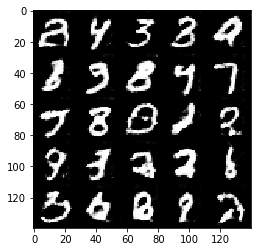

Epoch 2/2... Discriminator Loss: 1.3322... Generator Loss: 0.7450
Epoch 2/2... Discriminator Loss: 1.0383... Generator Loss: 0.9919
Epoch 2/2... Discriminator Loss: 1.2209... Generator Loss: 0.6358
Epoch 2/2... Discriminator Loss: 1.1619... Generator Loss: 0.8162
Epoch 2/2... Discriminator Loss: 1.3485... Generator Loss: 0.6291
Epoch 2/2... Discriminator Loss: 1.3930... Generator Loss: 0.6654
Epoch 2/2... Discriminator Loss: 0.8949... Generator Loss: 1.6874
Epoch 2/2... Discriminator Loss: 1.5323... Generator Loss: 0.7461
Epoch 2/2... Discriminator Loss: 1.0351... Generator Loss: 0.8756
Epoch 2/2... Discriminator Loss: 1.6014... Generator Loss: 0.5414


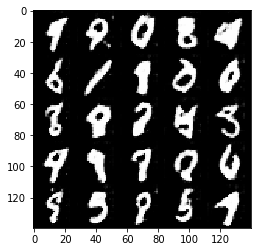

Epoch 2/2... Discriminator Loss: 1.3723... Generator Loss: 0.5817
Epoch 2/2... Discriminator Loss: 2.2278... Generator Loss: 2.5119
Epoch 2/2... Discriminator Loss: 1.1216... Generator Loss: 0.8393
Epoch 2/2... Discriminator Loss: 1.3526... Generator Loss: 1.3002
Epoch 2/2... Discriminator Loss: 2.0436... Generator Loss: 0.3227
Epoch 2/2... Discriminator Loss: 1.2880... Generator Loss: 0.7711
Epoch 2/2... Discriminator Loss: 2.3431... Generator Loss: 0.1912
Epoch 2/2... Discriminator Loss: 0.9761... Generator Loss: 1.6103
Epoch 2/2... Discriminator Loss: 0.9714... Generator Loss: 1.0450
Epoch 2/2... Discriminator Loss: 1.2499... Generator Loss: 0.9132


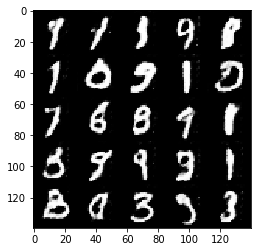

Epoch 2/2... Discriminator Loss: 2.9900... Generator Loss: 0.1231
Epoch 2/2... Discriminator Loss: 1.4259... Generator Loss: 0.6026
Epoch 2/2... Discriminator Loss: 1.2798... Generator Loss: 0.7043
Epoch 2/2... Discriminator Loss: 0.9511... Generator Loss: 0.9779
Epoch 2/2... Discriminator Loss: 1.0715... Generator Loss: 0.9626
Epoch 2/2... Discriminator Loss: 0.9731... Generator Loss: 1.0034
Epoch 2/2... Discriminator Loss: 1.6281... Generator Loss: 0.4937
Epoch 2/2... Discriminator Loss: 1.8383... Generator Loss: 0.3747
Epoch 2/2... Discriminator Loss: 1.1536... Generator Loss: 0.7302
Epoch 2/2... Discriminator Loss: 1.3823... Generator Loss: 0.5779


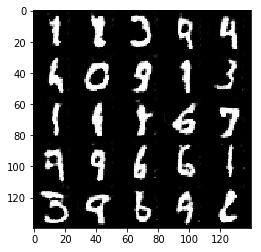

Epoch 2/2... Discriminator Loss: 1.1756... Generator Loss: 1.4912
Epoch 2/2... Discriminator Loss: 1.8626... Generator Loss: 0.3533
Epoch 2/2... Discriminator Loss: 1.1307... Generator Loss: 0.8241
Epoch 2/2... Discriminator Loss: 1.3130... Generator Loss: 0.6498
Epoch 2/2... Discriminator Loss: 0.8996... Generator Loss: 1.0802
Epoch 2/2... Discriminator Loss: 1.9211... Generator Loss: 0.3560
Epoch 2/2... Discriminator Loss: 1.8482... Generator Loss: 0.3388
Epoch 2/2... Discriminator Loss: 1.7379... Generator Loss: 0.4036
Epoch 2/2... Discriminator Loss: 1.4814... Generator Loss: 0.5189
Epoch 2/2... Discriminator Loss: 0.9107... Generator Loss: 1.1269


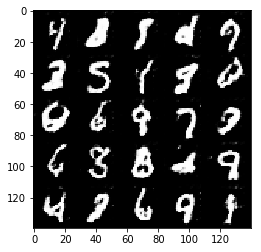

Epoch 2/2... Discriminator Loss: 1.6591... Generator Loss: 1.2460
Epoch 2/2... Discriminator Loss: 1.9212... Generator Loss: 0.3123
Epoch 2/2... Discriminator Loss: 1.6915... Generator Loss: 0.4655
Epoch 2/2... Discriminator Loss: 0.9684... Generator Loss: 1.0360
Epoch 2/2... Discriminator Loss: 1.6614... Generator Loss: 0.4828
Epoch 2/2... Discriminator Loss: 1.3221... Generator Loss: 0.7548
Epoch 2/2... Discriminator Loss: 1.3003... Generator Loss: 0.6850
Epoch 2/2... Discriminator Loss: 1.9704... Generator Loss: 0.3442
Epoch 2/2... Discriminator Loss: 1.5637... Generator Loss: 0.5811
Epoch 2/2... Discriminator Loss: 1.2077... Generator Loss: 0.7551


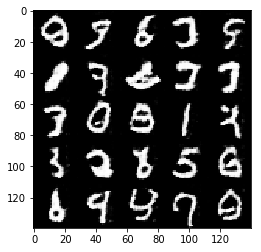

Epoch 2/2... Discriminator Loss: 2.1363... Generator Loss: 0.2753
Epoch 2/2... Discriminator Loss: 1.2260... Generator Loss: 0.8122
Epoch 2/2... Discriminator Loss: 1.7803... Generator Loss: 0.4362
Epoch 2/2... Discriminator Loss: 1.6023... Generator Loss: 0.4589
Epoch 2/2... Discriminator Loss: 0.9554... Generator Loss: 1.1519
Epoch 2/2... Discriminator Loss: 1.2315... Generator Loss: 0.7297
Epoch 2/2... Discriminator Loss: 1.2110... Generator Loss: 0.7752
Epoch 2/2... Discriminator Loss: 1.4834... Generator Loss: 0.5638
Epoch 2/2... Discriminator Loss: 0.8544... Generator Loss: 1.3220
Epoch 2/2... Discriminator Loss: 2.2985... Generator Loss: 0.2390


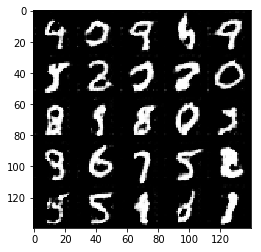

Epoch 2/2... Discriminator Loss: 1.4815... Generator Loss: 0.4835
Epoch 2/2... Discriminator Loss: 1.1309... Generator Loss: 0.8137
Epoch 2/2... Discriminator Loss: 1.1219... Generator Loss: 0.8423
Epoch 2/2... Discriminator Loss: 2.3183... Generator Loss: 0.2167
Epoch 2/2... Discriminator Loss: 1.7411... Generator Loss: 0.4746
Epoch 2/2... Discriminator Loss: 1.1781... Generator Loss: 1.0686
Epoch 2/2... Discriminator Loss: 1.6818... Generator Loss: 0.4269
Epoch 2/2... Discriminator Loss: 2.4748... Generator Loss: 0.1916
Epoch 2/2... Discriminator Loss: 1.6708... Generator Loss: 0.4304
Epoch 2/2... Discriminator Loss: 1.8846... Generator Loss: 0.4177


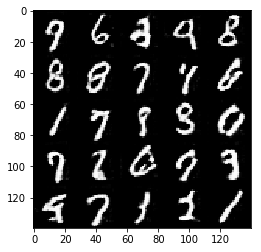

Epoch 2/2... Discriminator Loss: 1.5056... Generator Loss: 0.5859
Epoch 2/2... Discriminator Loss: 2.0889... Generator Loss: 0.2762
Epoch 2/2... Discriminator Loss: 1.8116... Generator Loss: 0.3556
Epoch 2/2... Discriminator Loss: 1.3167... Generator Loss: 0.7289
Epoch 2/2... Discriminator Loss: 1.5258... Generator Loss: 0.4649
Epoch 2/2... Discriminator Loss: 1.1737... Generator Loss: 0.7149
Epoch 2/2... Discriminator Loss: 0.8722... Generator Loss: 1.3906
Epoch 2/2... Discriminator Loss: 1.1386... Generator Loss: 0.9422
Epoch 2/2... Discriminator Loss: 1.0395... Generator Loss: 0.9618
Epoch 2/2... Discriminator Loss: 1.3809... Generator Loss: 1.2007


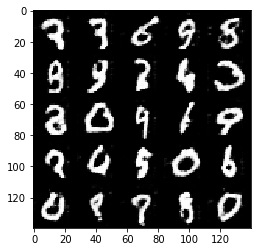

Epoch 2/2... Discriminator Loss: 1.6283... Generator Loss: 0.5588
Epoch 2/2... Discriminator Loss: 1.8677... Generator Loss: 0.3723
Epoch 2/2... Discriminator Loss: 0.6416... Generator Loss: 1.5985
Epoch 2/2... Discriminator Loss: 0.8188... Generator Loss: 1.3596
Epoch 2/2... Discriminator Loss: 0.9821... Generator Loss: 1.0201
Epoch 2/2... Discriminator Loss: 1.2530... Generator Loss: 0.7541
Epoch 2/2... Discriminator Loss: 1.3042... Generator Loss: 0.6900
Epoch 2/2... Discriminator Loss: 0.6619... Generator Loss: 1.7868
Epoch 2/2... Discriminator Loss: 1.1085... Generator Loss: 0.8862
Epoch 2/2... Discriminator Loss: 0.9852... Generator Loss: 2.4586


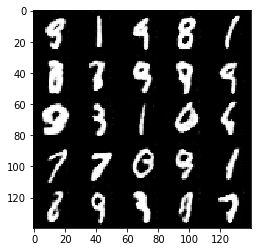

Epoch 2/2... Discriminator Loss: 1.1158... Generator Loss: 1.2280
Epoch 2/2... Discriminator Loss: 1.4285... Generator Loss: 0.5772
Epoch 2/2... Discriminator Loss: 1.0296... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 1.3223... Generator Loss: 0.6105
Epoch 2/2... Discriminator Loss: 1.0254... Generator Loss: 1.0384
Epoch 2/2... Discriminator Loss: 0.9319... Generator Loss: 1.1351
Epoch 2/2... Discriminator Loss: 1.7372... Generator Loss: 0.3587
Epoch 2/2... Discriminator Loss: 1.3842... Generator Loss: 0.6655
Epoch 2/2... Discriminator Loss: 1.1327... Generator Loss: 0.7906
Epoch 2/2... Discriminator Loss: 1.1484... Generator Loss: 1.1233


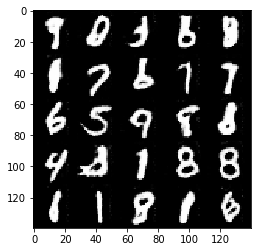

Epoch 2/2... Discriminator Loss: 1.0401... Generator Loss: 0.9978
Epoch 2/2... Discriminator Loss: 1.0040... Generator Loss: 1.2547
Epoch 2/2... Discriminator Loss: 0.6723... Generator Loss: 1.8941
Epoch 2/2... Discriminator Loss: 1.3066... Generator Loss: 0.6214
Epoch 2/2... Discriminator Loss: 1.3160... Generator Loss: 0.6307
Epoch 2/2... Discriminator Loss: 0.7745... Generator Loss: 1.3366
Epoch 2/2... Discriminator Loss: 1.0482... Generator Loss: 0.8475
Epoch 2/2... Discriminator Loss: 0.8619... Generator Loss: 1.1850
Epoch 2/2... Discriminator Loss: 1.4808... Generator Loss: 0.4951
Epoch 2/2... Discriminator Loss: 1.2008... Generator Loss: 0.6889


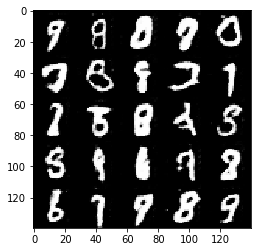

Epoch 2/2... Discriminator Loss: 0.9289... Generator Loss: 1.4689
Epoch 2/2... Discriminator Loss: 1.5141... Generator Loss: 2.4517
Epoch 2/2... Discriminator Loss: 1.8768... Generator Loss: 0.3588
Epoch 2/2... Discriminator Loss: 1.4277... Generator Loss: 0.5280
Epoch 2/2... Discriminator Loss: 2.3190... Generator Loss: 0.2491
Epoch 2/2... Discriminator Loss: 1.4623... Generator Loss: 0.6117
Epoch 2/2... Discriminator Loss: 1.3447... Generator Loss: 1.1004
Epoch 2/2... Discriminator Loss: 1.4080... Generator Loss: 0.6018
Epoch 2/2... Discriminator Loss: 1.1828... Generator Loss: 0.6911
Epoch 2/2... Discriminator Loss: 1.4746... Generator Loss: 0.6987


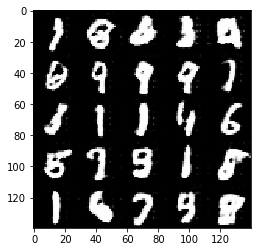

Epoch 2/2... Discriminator Loss: 1.5653... Generator Loss: 0.4941
Epoch 2/2... Discriminator Loss: 1.5279... Generator Loss: 0.4903
Epoch 2/2... Discriminator Loss: 2.0072... Generator Loss: 0.2506
Epoch 2/2... Discriminator Loss: 1.6537... Generator Loss: 1.8198
Epoch 2/2... Discriminator Loss: 1.5007... Generator Loss: 0.5239
Epoch 2/2... Discriminator Loss: 1.5217... Generator Loss: 0.5393
Epoch 2/2... Discriminator Loss: 1.9131... Generator Loss: 0.3763
Epoch 2/2... Discriminator Loss: 1.7436... Generator Loss: 0.5705
Epoch 2/2... Discriminator Loss: 1.7296... Generator Loss: 0.4535
Epoch 2/2... Discriminator Loss: 1.5735... Generator Loss: 0.4603


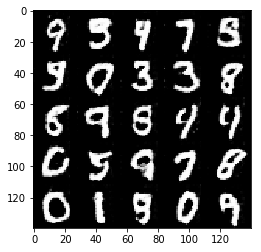

Epoch 2/2... Discriminator Loss: 0.8128... Generator Loss: 1.1362
Epoch 2/2... Discriminator Loss: 0.8636... Generator Loss: 1.3093
Epoch 2/2... Discriminator Loss: 1.0513... Generator Loss: 0.9453
Epoch 2/2... Discriminator Loss: 1.2081... Generator Loss: 0.7730
Epoch 2/2... Discriminator Loss: 1.3343... Generator Loss: 0.6208
Epoch 2/2... Discriminator Loss: 1.0773... Generator Loss: 1.5115
Epoch 2/2... Discriminator Loss: 1.9749... Generator Loss: 0.3485
Epoch 2/2... Discriminator Loss: 1.8044... Generator Loss: 0.3987
Epoch 2/2... Discriminator Loss: 1.3234... Generator Loss: 0.6995
Epoch 2/2... Discriminator Loss: 1.4403... Generator Loss: 0.5278


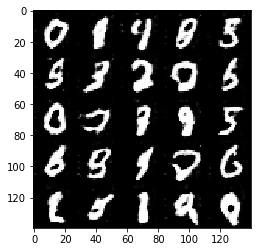

Epoch 2/2... Discriminator Loss: 1.1893... Generator Loss: 0.7678
Epoch 2/2... Discriminator Loss: 1.6653... Generator Loss: 0.4421
Epoch 2/2... Discriminator Loss: 1.3052... Generator Loss: 0.6444
Epoch 2/2... Discriminator Loss: 1.1294... Generator Loss: 0.7946
Epoch 2/2... Discriminator Loss: 1.7720... Generator Loss: 0.4685
Epoch 2/2... Discriminator Loss: 1.8491... Generator Loss: 0.4278
Epoch 2/2... Discriminator Loss: 1.0028... Generator Loss: 1.0121
Epoch 2/2... Discriminator Loss: 1.2071... Generator Loss: 0.7603
Epoch 2/2... Discriminator Loss: 1.0122... Generator Loss: 0.9284
Epoch 2/2... Discriminator Loss: 1.1381... Generator Loss: 1.6339


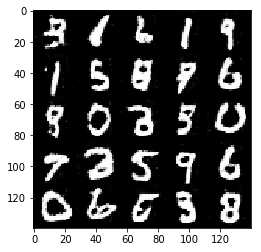

Epoch 2/2... Discriminator Loss: 3.1244... Generator Loss: 0.1057
Epoch 2/2... Discriminator Loss: 1.1320... Generator Loss: 0.9453
Epoch 2/2... Discriminator Loss: 1.9020... Generator Loss: 0.3200
Epoch 2/2... Discriminator Loss: 1.6374... Generator Loss: 0.4266
Epoch 2/2... Discriminator Loss: 1.2490... Generator Loss: 0.6635
Epoch 2/2... Discriminator Loss: 1.4843... Generator Loss: 0.5226
Epoch 2/2... Discriminator Loss: 1.1372... Generator Loss: 0.9203
Epoch 2/2... Discriminator Loss: 2.0998... Generator Loss: 0.3531
Epoch 2/2... Discriminator Loss: 2.3793... Generator Loss: 0.2508
Epoch 2/2... Discriminator Loss: 2.0369... Generator Loss: 0.3128


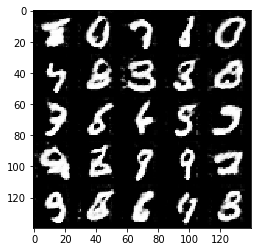

Epoch 2/2... Discriminator Loss: 0.9671... Generator Loss: 1.1696
Epoch 2/2... Discriminator Loss: 1.2488... Generator Loss: 0.8077
Epoch 2/2... Discriminator Loss: 1.1220... Generator Loss: 0.8643
Epoch 2/2... Discriminator Loss: 1.9834... Generator Loss: 0.2949
Epoch 2/2... Discriminator Loss: 1.1335... Generator Loss: 0.8614
Epoch 2/2... Discriminator Loss: 1.0155... Generator Loss: 0.8757
Epoch 2/2... Discriminator Loss: 1.1926... Generator Loss: 0.7564
Epoch 2/2... Discriminator Loss: 2.0773... Generator Loss: 0.2428
Epoch 2/2... Discriminator Loss: 1.3549... Generator Loss: 0.6040
Epoch 2/2... Discriminator Loss: 1.3830... Generator Loss: 0.6424


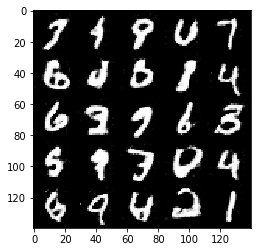

Epoch 2/2... Discriminator Loss: 1.3758... Generator Loss: 0.6164
Epoch 2/2... Discriminator Loss: 1.3943... Generator Loss: 1.1380
Epoch 2/2... Discriminator Loss: 1.2594... Generator Loss: 0.6929
Epoch 2/2... Discriminator Loss: 1.3647... Generator Loss: 0.5870
Epoch 2/2... Discriminator Loss: 0.9645... Generator Loss: 0.9947


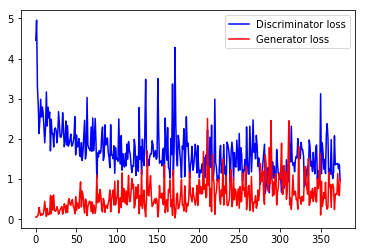

Ending --  2018-06-06 13:36:55.845517


In [31]:
import datetime

batch_size = 32
z_dim = 25088
learning_rate = 0.0005
beta1 = 0.5 # AS per review, optimal value is between 0.1 and 0.3 for good results

print("Starting -- ",  datetime.datetime.now())

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
    
print("Ending -- ",  datetime.datetime.now())

# CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Starting --  2018-06-06 19:33:26.401562
Epoch 1/1... Discriminator Loss: 4.0304... Generator Loss: 0.0557
Epoch 1/1... Discriminator Loss: 4.8341... Generator Loss: 0.0337
Epoch 1/1... Discriminator Loss: 2.8728... Generator Loss: 1.3602
Epoch 1/1... Discriminator Loss: 3.3475... Generator Loss: 0.1693
Epoch 1/1... Discriminator Loss: 2.4961... Generator Loss: 0.3418
Epoch 1/1... Discriminator Loss: 2.5799... Generator Loss: 0.4582
Epoch 1/1... Discriminator Loss: 2.3597... Generator Loss: 0.3367
Epoch 1/1... Discriminator Loss: 2.0927... Generator Loss: 0.4063
Epoch 1/1... Discriminator Loss: 1.9887... Generator Loss: 0.4613
Epoch 1/1... Discriminator Loss: 2.2327... Generator Loss: 0.4764


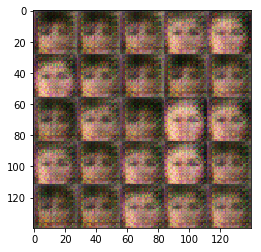

Epoch 1/1... Discriminator Loss: 2.1239... Generator Loss: 0.4716
Epoch 1/1... Discriminator Loss: 2.4087... Generator Loss: 0.2657
Epoch 1/1... Discriminator Loss: 2.0521... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.6486... Generator Loss: 0.5303
Epoch 1/1... Discriminator Loss: 1.9207... Generator Loss: 0.5956
Epoch 1/1... Discriminator Loss: 1.8059... Generator Loss: 0.3991
Epoch 1/1... Discriminator Loss: 2.1515... Generator Loss: 0.3381
Epoch 1/1... Discriminator Loss: 1.7496... Generator Loss: 0.5664
Epoch 1/1... Discriminator Loss: 1.7470... Generator Loss: 0.4843
Epoch 1/1... Discriminator Loss: 1.8107... Generator Loss: 0.4534


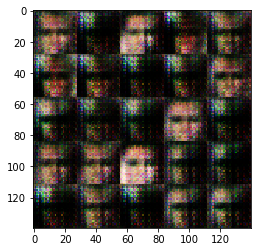

Epoch 1/1... Discriminator Loss: 1.8060... Generator Loss: 0.5203
Epoch 1/1... Discriminator Loss: 1.5466... Generator Loss: 0.7522
Epoch 1/1... Discriminator Loss: 1.6747... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 1.6710... Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 1.6900... Generator Loss: 0.4796
Epoch 1/1... Discriminator Loss: 1.8054... Generator Loss: 0.5387
Epoch 1/1... Discriminator Loss: 2.0635... Generator Loss: 0.4452
Epoch 1/1... Discriminator Loss: 1.9769... Generator Loss: 0.5110
Epoch 1/1... Discriminator Loss: 1.8314... Generator Loss: 0.4777
Epoch 1/1... Discriminator Loss: 2.0375... Generator Loss: 0.4590


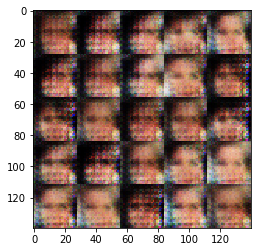

Epoch 1/1... Discriminator Loss: 2.2571... Generator Loss: 0.2323
Epoch 1/1... Discriminator Loss: 2.0677... Generator Loss: 0.2945
Epoch 1/1... Discriminator Loss: 1.8824... Generator Loss: 0.4820
Epoch 1/1... Discriminator Loss: 2.0613... Generator Loss: 0.4878
Epoch 1/1... Discriminator Loss: 2.0649... Generator Loss: 0.3248
Epoch 1/1... Discriminator Loss: 1.7838... Generator Loss: 0.4592
Epoch 1/1... Discriminator Loss: 1.9728... Generator Loss: 0.4392
Epoch 1/1... Discriminator Loss: 1.9329... Generator Loss: 0.3502
Epoch 1/1... Discriminator Loss: 2.1421... Generator Loss: 0.3268
Epoch 1/1... Discriminator Loss: 1.8638... Generator Loss: 0.4984


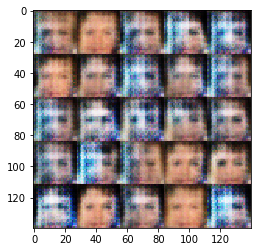

Epoch 1/1... Discriminator Loss: 1.8955... Generator Loss: 0.4877
Epoch 1/1... Discriminator Loss: 2.0443... Generator Loss: 0.2830
Epoch 1/1... Discriminator Loss: 1.9706... Generator Loss: 0.4188
Epoch 1/1... Discriminator Loss: 1.8559... Generator Loss: 0.3850
Epoch 1/1... Discriminator Loss: 1.8393... Generator Loss: 0.4180
Epoch 1/1... Discriminator Loss: 1.9453... Generator Loss: 0.3775
Epoch 1/1... Discriminator Loss: 2.0227... Generator Loss: 0.3957
Epoch 1/1... Discriminator Loss: 1.8110... Generator Loss: 0.4765
Epoch 1/1... Discriminator Loss: 2.0071... Generator Loss: 0.4245
Epoch 1/1... Discriminator Loss: 1.9219... Generator Loss: 0.3765


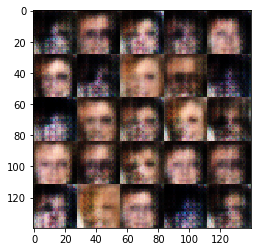

Epoch 1/1... Discriminator Loss: 1.9579... Generator Loss: 0.3479
Epoch 1/1... Discriminator Loss: 1.9182... Generator Loss: 0.4343
Epoch 1/1... Discriminator Loss: 2.1031... Generator Loss: 0.3048
Epoch 1/1... Discriminator Loss: 1.8351... Generator Loss: 0.4875
Epoch 1/1... Discriminator Loss: 2.0649... Generator Loss: 0.3502
Epoch 1/1... Discriminator Loss: 2.1872... Generator Loss: 0.3539
Epoch 1/1... Discriminator Loss: 1.9592... Generator Loss: 0.3978
Epoch 1/1... Discriminator Loss: 2.0799... Generator Loss: 0.3231
Epoch 1/1... Discriminator Loss: 1.9136... Generator Loss: 0.3713
Epoch 1/1... Discriminator Loss: 2.0525... Generator Loss: 0.3339


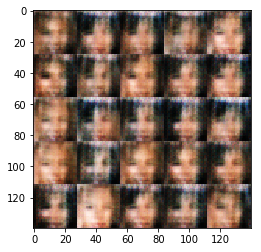

Epoch 1/1... Discriminator Loss: 2.2553... Generator Loss: 0.2934
Epoch 1/1... Discriminator Loss: 1.9227... Generator Loss: 0.3794
Epoch 1/1... Discriminator Loss: 1.7763... Generator Loss: 0.4510
Epoch 1/1... Discriminator Loss: 2.1242... Generator Loss: 0.2974
Epoch 1/1... Discriminator Loss: 1.9461... Generator Loss: 0.4494
Epoch 1/1... Discriminator Loss: 2.1263... Generator Loss: 0.3329
Epoch 1/1... Discriminator Loss: 1.9000... Generator Loss: 0.4413
Epoch 1/1... Discriminator Loss: 2.0813... Generator Loss: 0.3081
Epoch 1/1... Discriminator Loss: 1.9627... Generator Loss: 0.3785
Epoch 1/1... Discriminator Loss: 2.1619... Generator Loss: 0.3005


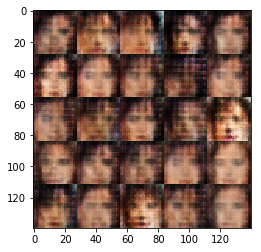

Epoch 1/1... Discriminator Loss: 1.6710... Generator Loss: 0.5265
Epoch 1/1... Discriminator Loss: 1.8049... Generator Loss: 0.4816
Epoch 1/1... Discriminator Loss: 1.9953... Generator Loss: 0.4031
Epoch 1/1... Discriminator Loss: 1.9407... Generator Loss: 0.3744
Epoch 1/1... Discriminator Loss: 2.1341... Generator Loss: 0.4415
Epoch 1/1... Discriminator Loss: 1.9742... Generator Loss: 0.3251
Epoch 1/1... Discriminator Loss: 2.2418... Generator Loss: 0.3046
Epoch 1/1... Discriminator Loss: 2.1334... Generator Loss: 0.3290
Epoch 1/1... Discriminator Loss: 1.9707... Generator Loss: 0.3624
Epoch 1/1... Discriminator Loss: 2.0901... Generator Loss: 0.3463


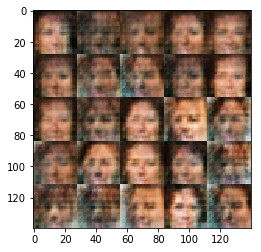

Epoch 1/1... Discriminator Loss: 2.0772... Generator Loss: 0.3211
Epoch 1/1... Discriminator Loss: 2.0155... Generator Loss: 0.3300
Epoch 1/1... Discriminator Loss: 1.9463... Generator Loss: 0.3910
Epoch 1/1... Discriminator Loss: 2.1120... Generator Loss: 0.3631
Epoch 1/1... Discriminator Loss: 1.9746... Generator Loss: 0.3668
Epoch 1/1... Discriminator Loss: 1.7285... Generator Loss: 0.5032
Epoch 1/1... Discriminator Loss: 1.9995... Generator Loss: 0.3752
Epoch 1/1... Discriminator Loss: 2.0173... Generator Loss: 0.3455
Epoch 1/1... Discriminator Loss: 2.2981... Generator Loss: 0.2559
Epoch 1/1... Discriminator Loss: 2.0641... Generator Loss: 0.3560


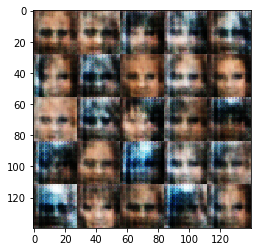

Epoch 1/1... Discriminator Loss: 2.0051... Generator Loss: 0.3579
Epoch 1/1... Discriminator Loss: 1.9728... Generator Loss: 0.3924
Epoch 1/1... Discriminator Loss: 1.8924... Generator Loss: 0.4165
Epoch 1/1... Discriminator Loss: 1.9374... Generator Loss: 0.3926
Epoch 1/1... Discriminator Loss: 1.9500... Generator Loss: 0.4380
Epoch 1/1... Discriminator Loss: 1.7866... Generator Loss: 0.4660
Epoch 1/1... Discriminator Loss: 1.9357... Generator Loss: 0.3808
Epoch 1/1... Discriminator Loss: 1.7345... Generator Loss: 0.4761
Epoch 1/1... Discriminator Loss: 2.0920... Generator Loss: 0.3614
Epoch 1/1... Discriminator Loss: 1.9521... Generator Loss: 0.3355


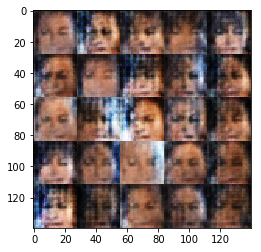

Epoch 1/1... Discriminator Loss: 2.0018... Generator Loss: 0.3644
Epoch 1/1... Discriminator Loss: 1.8109... Generator Loss: 0.4826
Epoch 1/1... Discriminator Loss: 1.8468... Generator Loss: 0.4259
Epoch 1/1... Discriminator Loss: 1.8433... Generator Loss: 0.4390
Epoch 1/1... Discriminator Loss: 1.8016... Generator Loss: 0.4484
Epoch 1/1... Discriminator Loss: 2.0357... Generator Loss: 0.3633
Epoch 1/1... Discriminator Loss: 1.7317... Generator Loss: 0.5457
Epoch 1/1... Discriminator Loss: 1.7911... Generator Loss: 0.4299
Epoch 1/1... Discriminator Loss: 1.8100... Generator Loss: 0.4077
Epoch 1/1... Discriminator Loss: 1.9026... Generator Loss: 0.4111


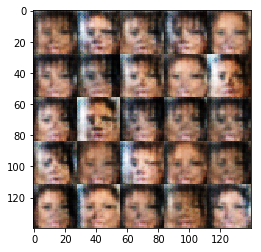

Epoch 1/1... Discriminator Loss: 2.0086... Generator Loss: 0.3764
Epoch 1/1... Discriminator Loss: 1.8200... Generator Loss: 0.4768
Epoch 1/1... Discriminator Loss: 1.8372... Generator Loss: 0.4523
Epoch 1/1... Discriminator Loss: 1.7797... Generator Loss: 0.5084
Epoch 1/1... Discriminator Loss: 1.8943... Generator Loss: 0.4153
Epoch 1/1... Discriminator Loss: 2.0255... Generator Loss: 0.3230
Epoch 1/1... Discriminator Loss: 1.8459... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 1.9037... Generator Loss: 0.3896
Epoch 1/1... Discriminator Loss: 1.8686... Generator Loss: 0.3990
Epoch 1/1... Discriminator Loss: 1.7472... Generator Loss: 0.4814


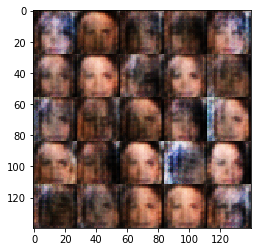

Epoch 1/1... Discriminator Loss: 1.7969... Generator Loss: 0.5004
Epoch 1/1... Discriminator Loss: 1.8600... Generator Loss: 0.3944
Epoch 1/1... Discriminator Loss: 1.9277... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 1.7606... Generator Loss: 0.5105
Epoch 1/1... Discriminator Loss: 1.8610... Generator Loss: 0.4177
Epoch 1/1... Discriminator Loss: 1.7873... Generator Loss: 0.5045
Epoch 1/1... Discriminator Loss: 1.7701... Generator Loss: 0.5041
Epoch 1/1... Discriminator Loss: 1.7995... Generator Loss: 0.4312
Epoch 1/1... Discriminator Loss: 1.7890... Generator Loss: 0.4554
Epoch 1/1... Discriminator Loss: 1.8281... Generator Loss: 0.4839


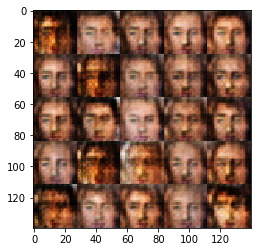

Epoch 1/1... Discriminator Loss: 1.8743... Generator Loss: 0.4368
Epoch 1/1... Discriminator Loss: 2.0154... Generator Loss: 0.3319
Epoch 1/1... Discriminator Loss: 1.7679... Generator Loss: 0.4701
Epoch 1/1... Discriminator Loss: 1.8197... Generator Loss: 0.4939
Epoch 1/1... Discriminator Loss: 1.6586... Generator Loss: 0.5277
Epoch 1/1... Discriminator Loss: 1.7912... Generator Loss: 0.4676
Epoch 1/1... Discriminator Loss: 1.7710... Generator Loss: 0.5069
Epoch 1/1... Discriminator Loss: 1.7846... Generator Loss: 0.4383
Epoch 1/1... Discriminator Loss: 1.8295... Generator Loss: 0.4322
Epoch 1/1... Discriminator Loss: 1.7820... Generator Loss: 0.4227


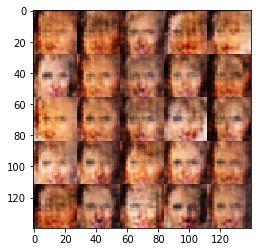

Epoch 1/1... Discriminator Loss: 1.7374... Generator Loss: 0.4303
Epoch 1/1... Discriminator Loss: 1.8025... Generator Loss: 0.4732
Epoch 1/1... Discriminator Loss: 1.8571... Generator Loss: 0.4342
Epoch 1/1... Discriminator Loss: 1.8559... Generator Loss: 0.4428
Epoch 1/1... Discriminator Loss: 1.9637... Generator Loss: 0.3561
Epoch 1/1... Discriminator Loss: 1.8563... Generator Loss: 0.4028
Epoch 1/1... Discriminator Loss: 1.8280... Generator Loss: 0.4634
Epoch 1/1... Discriminator Loss: 1.6512... Generator Loss: 0.5267
Epoch 1/1... Discriminator Loss: 1.8650... Generator Loss: 0.3988
Epoch 1/1... Discriminator Loss: 1.7799... Generator Loss: 0.4974


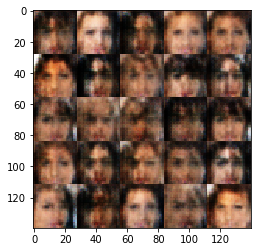

Epoch 1/1... Discriminator Loss: 1.7559... Generator Loss: 0.4413
Epoch 1/1... Discriminator Loss: 1.8944... Generator Loss: 0.4038
Epoch 1/1... Discriminator Loss: 1.8738... Generator Loss: 0.3693
Epoch 1/1... Discriminator Loss: 1.8154... Generator Loss: 0.4265
Epoch 1/1... Discriminator Loss: 1.8105... Generator Loss: 0.4678
Epoch 1/1... Discriminator Loss: 1.8265... Generator Loss: 0.4716
Epoch 1/1... Discriminator Loss: 1.7957... Generator Loss: 0.4398
Epoch 1/1... Discriminator Loss: 1.8318... Generator Loss: 0.4004
Epoch 1/1... Discriminator Loss: 1.8263... Generator Loss: 0.4754
Epoch 1/1... Discriminator Loss: 1.7984... Generator Loss: 0.4515


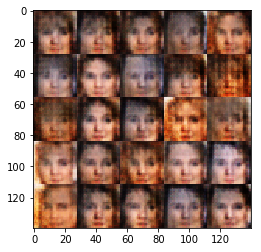

Epoch 1/1... Discriminator Loss: 1.7704... Generator Loss: 0.4125
Epoch 1/1... Discriminator Loss: 1.7213... Generator Loss: 0.4730
Epoch 1/1... Discriminator Loss: 1.8631... Generator Loss: 0.4132
Epoch 1/1... Discriminator Loss: 1.7970... Generator Loss: 0.4645
Epoch 1/1... Discriminator Loss: 1.7582... Generator Loss: 0.4528
Epoch 1/1... Discriminator Loss: 1.8083... Generator Loss: 0.5044
Epoch 1/1... Discriminator Loss: 1.7121... Generator Loss: 0.5805
Epoch 1/1... Discriminator Loss: 1.8907... Generator Loss: 0.3804
Epoch 1/1... Discriminator Loss: 1.6248... Generator Loss: 0.5492
Epoch 1/1... Discriminator Loss: 1.7399... Generator Loss: 0.5244


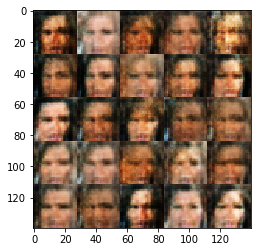

Epoch 1/1... Discriminator Loss: 1.8253... Generator Loss: 0.5227
Epoch 1/1... Discriminator Loss: 1.7810... Generator Loss: 0.4176
Epoch 1/1... Discriminator Loss: 1.7374... Generator Loss: 0.4883
Epoch 1/1... Discriminator Loss: 1.7026... Generator Loss: 0.5320
Epoch 1/1... Discriminator Loss: 1.7469... Generator Loss: 0.5817
Epoch 1/1... Discriminator Loss: 1.8341... Generator Loss: 0.4452
Epoch 1/1... Discriminator Loss: 1.7974... Generator Loss: 0.4400
Epoch 1/1... Discriminator Loss: 1.7352... Generator Loss: 0.4641
Epoch 1/1... Discriminator Loss: 1.7508... Generator Loss: 0.4638
Epoch 1/1... Discriminator Loss: 1.7604... Generator Loss: 0.5210


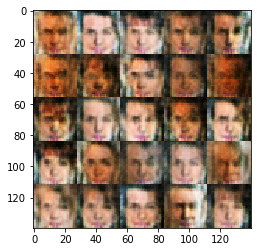

Epoch 1/1... Discriminator Loss: 1.8266... Generator Loss: 0.4419
Epoch 1/1... Discriminator Loss: 1.6344... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.7012... Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 1.7429... Generator Loss: 0.4678
Epoch 1/1... Discriminator Loss: 1.6764... Generator Loss: 0.4901
Epoch 1/1... Discriminator Loss: 1.7693... Generator Loss: 0.5352
Epoch 1/1... Discriminator Loss: 1.7462... Generator Loss: 0.4716
Epoch 1/1... Discriminator Loss: 1.6489... Generator Loss: 0.5388
Epoch 1/1... Discriminator Loss: 1.8824... Generator Loss: 0.4383
Epoch 1/1... Discriminator Loss: 1.9951... Generator Loss: 0.3860


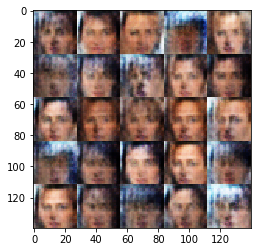

Epoch 1/1... Discriminator Loss: 1.8301... Generator Loss: 0.4675
Epoch 1/1... Discriminator Loss: 1.6786... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.8135... Generator Loss: 0.5312
Epoch 1/1... Discriminator Loss: 1.7422... Generator Loss: 0.4718
Epoch 1/1... Discriminator Loss: 1.6916... Generator Loss: 0.5020
Epoch 1/1... Discriminator Loss: 1.7686... Generator Loss: 0.5073
Epoch 1/1... Discriminator Loss: 1.8498... Generator Loss: 0.3616
Epoch 1/1... Discriminator Loss: 1.8394... Generator Loss: 0.3938
Epoch 1/1... Discriminator Loss: 1.7922... Generator Loss: 0.4958
Epoch 1/1... Discriminator Loss: 1.6633... Generator Loss: 0.6562


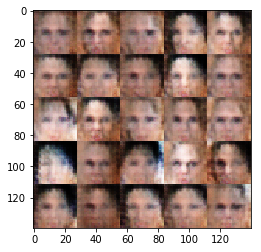

Epoch 1/1... Discriminator Loss: 1.6780... Generator Loss: 0.5609
Epoch 1/1... Discriminator Loss: 1.8606... Generator Loss: 0.4677
Epoch 1/1... Discriminator Loss: 1.8131... Generator Loss: 0.4179
Epoch 1/1... Discriminator Loss: 1.7542... Generator Loss: 0.4744
Epoch 1/1... Discriminator Loss: 1.9564... Generator Loss: 0.4041
Epoch 1/1... Discriminator Loss: 1.8089... Generator Loss: 0.4943
Epoch 1/1... Discriminator Loss: 1.8356... Generator Loss: 0.4578
Epoch 1/1... Discriminator Loss: 1.7721... Generator Loss: 0.4430
Epoch 1/1... Discriminator Loss: 1.7580... Generator Loss: 0.4786
Epoch 1/1... Discriminator Loss: 1.7486... Generator Loss: 0.4664


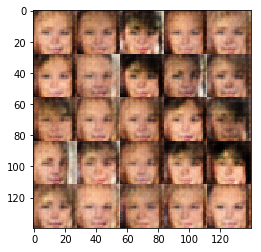

Epoch 1/1... Discriminator Loss: 1.8439... Generator Loss: 0.3896
Epoch 1/1... Discriminator Loss: 1.6732... Generator Loss: 0.4973
Epoch 1/1... Discriminator Loss: 1.7858... Generator Loss: 0.4490
Epoch 1/1... Discriminator Loss: 1.7319... Generator Loss: 0.4804
Epoch 1/1... Discriminator Loss: 1.8159... Generator Loss: 0.4626
Epoch 1/1... Discriminator Loss: 1.6739... Generator Loss: 0.5508
Epoch 1/1... Discriminator Loss: 1.7579... Generator Loss: 0.5593
Epoch 1/1... Discriminator Loss: 1.6999... Generator Loss: 0.4938
Epoch 1/1... Discriminator Loss: 1.7831... Generator Loss: 0.4306
Epoch 1/1... Discriminator Loss: 1.7050... Generator Loss: 0.4958


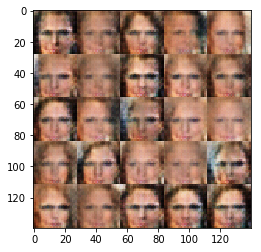

Epoch 1/1... Discriminator Loss: 1.8667... Generator Loss: 0.4078
Epoch 1/1... Discriminator Loss: 1.8474... Generator Loss: 0.5179
Epoch 1/1... Discriminator Loss: 1.8673... Generator Loss: 0.3910
Epoch 1/1... Discriminator Loss: 1.8455... Generator Loss: 0.4945
Epoch 1/1... Discriminator Loss: 1.8798... Generator Loss: 0.4045
Epoch 1/1... Discriminator Loss: 1.7382... Generator Loss: 0.4582
Epoch 1/1... Discriminator Loss: 1.7753... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 1.8910... Generator Loss: 0.4013
Epoch 1/1... Discriminator Loss: 1.8828... Generator Loss: 0.3753
Epoch 1/1... Discriminator Loss: 1.9068... Generator Loss: 0.3348


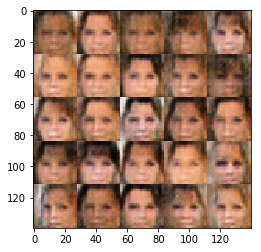

Epoch 1/1... Discriminator Loss: 1.9980... Generator Loss: 0.3863
Epoch 1/1... Discriminator Loss: 1.8477... Generator Loss: 0.4744
Epoch 1/1... Discriminator Loss: 1.7635... Generator Loss: 0.4145
Epoch 1/1... Discriminator Loss: 1.9014... Generator Loss: 0.4106
Epoch 1/1... Discriminator Loss: 1.8990... Generator Loss: 0.3834
Epoch 1/1... Discriminator Loss: 1.8258... Generator Loss: 0.4496
Epoch 1/1... Discriminator Loss: 1.6700... Generator Loss: 0.5861
Epoch 1/1... Discriminator Loss: 1.8137... Generator Loss: 0.4358
Epoch 1/1... Discriminator Loss: 1.9395... Generator Loss: 0.3731
Epoch 1/1... Discriminator Loss: 1.8381... Generator Loss: 0.4365


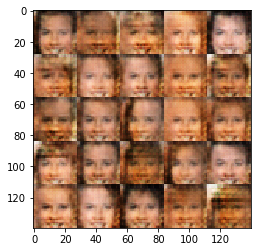

Epoch 1/1... Discriminator Loss: 1.7277... Generator Loss: 0.4962
Epoch 1/1... Discriminator Loss: 1.8407... Generator Loss: 0.4202
Epoch 1/1... Discriminator Loss: 1.9408... Generator Loss: 0.3702
Epoch 1/1... Discriminator Loss: 1.8960... Generator Loss: 0.3920
Epoch 1/1... Discriminator Loss: 1.6881... Generator Loss: 0.5105
Epoch 1/1... Discriminator Loss: 1.8488... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 1.8874... Generator Loss: 0.3996
Epoch 1/1... Discriminator Loss: 1.7792... Generator Loss: 0.4335
Epoch 1/1... Discriminator Loss: 1.8123... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 1.6923... Generator Loss: 0.4495


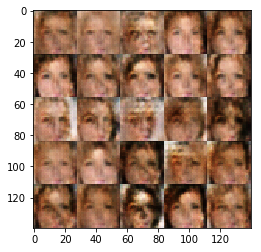

Epoch 1/1... Discriminator Loss: 1.9623... Generator Loss: 0.3432
Epoch 1/1... Discriminator Loss: 1.8554... Generator Loss: 0.5281
Epoch 1/1... Discriminator Loss: 1.8497... Generator Loss: 0.4272
Epoch 1/1... Discriminator Loss: 1.8740... Generator Loss: 0.4268
Epoch 1/1... Discriminator Loss: 1.8087... Generator Loss: 0.4414
Epoch 1/1... Discriminator Loss: 1.7251... Generator Loss: 0.4979
Epoch 1/1... Discriminator Loss: 1.8035... Generator Loss: 0.4479
Epoch 1/1... Discriminator Loss: 2.0850... Generator Loss: 0.3039
Epoch 1/1... Discriminator Loss: 1.8163... Generator Loss: 0.4552
Epoch 1/1... Discriminator Loss: 1.8101... Generator Loss: 0.4102


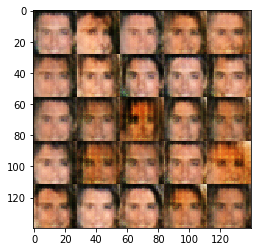

Epoch 1/1... Discriminator Loss: 1.9897... Generator Loss: 0.3013
Epoch 1/1... Discriminator Loss: 1.9323... Generator Loss: 0.3531
Epoch 1/1... Discriminator Loss: 1.8850... Generator Loss: 0.4450
Epoch 1/1... Discriminator Loss: 1.9613... Generator Loss: 0.4095
Epoch 1/1... Discriminator Loss: 1.7387... Generator Loss: 0.4541
Epoch 1/1... Discriminator Loss: 1.8714... Generator Loss: 0.3839
Epoch 1/1... Discriminator Loss: 1.7509... Generator Loss: 0.4636
Epoch 1/1... Discriminator Loss: 1.8282... Generator Loss: 0.4042
Epoch 1/1... Discriminator Loss: 2.0737... Generator Loss: 0.2975
Epoch 1/1... Discriminator Loss: 1.6646... Generator Loss: 0.5185


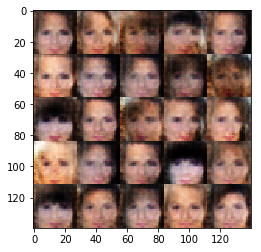

Epoch 1/1... Discriminator Loss: 1.8247... Generator Loss: 0.4428
Epoch 1/1... Discriminator Loss: 1.9625... Generator Loss: 0.3511
Epoch 1/1... Discriminator Loss: 2.0050... Generator Loss: 0.3537
Epoch 1/1... Discriminator Loss: 1.9152... Generator Loss: 0.3923
Epoch 1/1... Discriminator Loss: 1.8722... Generator Loss: 0.3619
Epoch 1/1... Discriminator Loss: 1.7331... Generator Loss: 0.4293
Epoch 1/1... Discriminator Loss: 1.8611... Generator Loss: 0.4272
Epoch 1/1... Discriminator Loss: 1.7517... Generator Loss: 0.4237
Epoch 1/1... Discriminator Loss: 1.9254... Generator Loss: 0.3796
Epoch 1/1... Discriminator Loss: 1.8505... Generator Loss: 0.4541


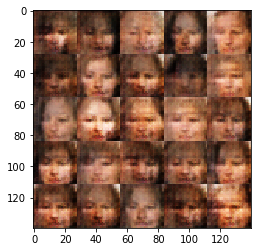

Epoch 1/1... Discriminator Loss: 1.7424... Generator Loss: 0.5581
Epoch 1/1... Discriminator Loss: 1.7657... Generator Loss: 0.5285
Epoch 1/1... Discriminator Loss: 1.7071... Generator Loss: 0.5551
Epoch 1/1... Discriminator Loss: 1.8547... Generator Loss: 0.4418
Epoch 1/1... Discriminator Loss: 1.8494... Generator Loss: 0.4076
Epoch 1/1... Discriminator Loss: 1.8901... Generator Loss: 0.4046
Epoch 1/1... Discriminator Loss: 1.7888... Generator Loss: 0.4143
Epoch 1/1... Discriminator Loss: 2.0274... Generator Loss: 0.3413
Epoch 1/1... Discriminator Loss: 1.8703... Generator Loss: 0.3782
Epoch 1/1... Discriminator Loss: 2.0021... Generator Loss: 0.3764


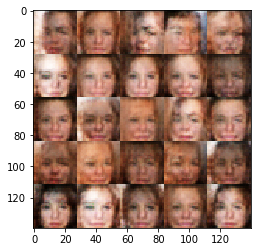

Epoch 1/1... Discriminator Loss: 1.7963... Generator Loss: 0.4853
Epoch 1/1... Discriminator Loss: 1.8378... Generator Loss: 0.3639
Epoch 1/1... Discriminator Loss: 1.8429... Generator Loss: 0.4529
Epoch 1/1... Discriminator Loss: 1.7900... Generator Loss: 0.4966
Epoch 1/1... Discriminator Loss: 1.7731... Generator Loss: 0.4260
Epoch 1/1... Discriminator Loss: 1.8864... Generator Loss: 0.3724
Epoch 1/1... Discriminator Loss: 1.9320... Generator Loss: 0.3873
Epoch 1/1... Discriminator Loss: 1.8819... Generator Loss: 0.3874
Epoch 1/1... Discriminator Loss: 1.8764... Generator Loss: 0.3588
Epoch 1/1... Discriminator Loss: 1.8643... Generator Loss: 0.4035


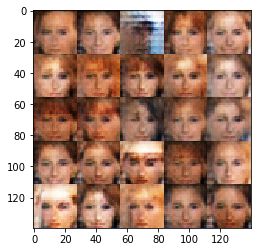

Epoch 1/1... Discriminator Loss: 1.9139... Generator Loss: 0.3228
Epoch 1/1... Discriminator Loss: 1.8125... Generator Loss: 0.4178
Epoch 1/1... Discriminator Loss: 1.8152... Generator Loss: 0.4264
Epoch 1/1... Discriminator Loss: 1.8396... Generator Loss: 0.4251
Epoch 1/1... Discriminator Loss: 1.9695... Generator Loss: 0.3306
Epoch 1/1... Discriminator Loss: 1.7179... Generator Loss: 0.4565
Epoch 1/1... Discriminator Loss: 1.9668... Generator Loss: 0.3152
Epoch 1/1... Discriminator Loss: 1.8836... Generator Loss: 0.4561
Epoch 1/1... Discriminator Loss: 1.9853... Generator Loss: 0.3591
Epoch 1/1... Discriminator Loss: 2.0079... Generator Loss: 0.4083


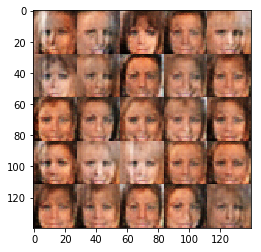

Epoch 1/1... Discriminator Loss: 1.8625... Generator Loss: 0.4238
Epoch 1/1... Discriminator Loss: 1.9156... Generator Loss: 0.3249
Epoch 1/1... Discriminator Loss: 2.1516... Generator Loss: 0.2787
Epoch 1/1... Discriminator Loss: 1.8750... Generator Loss: 0.4181
Epoch 1/1... Discriminator Loss: 1.9594... Generator Loss: 0.3055
Epoch 1/1... Discriminator Loss: 1.9111... Generator Loss: 0.3658
Epoch 1/1... Discriminator Loss: 1.9584... Generator Loss: 0.3640
Epoch 1/1... Discriminator Loss: 2.0742... Generator Loss: 0.2785
Epoch 1/1... Discriminator Loss: 1.9779... Generator Loss: 0.3319
Epoch 1/1... Discriminator Loss: 1.8180... Generator Loss: 0.3796


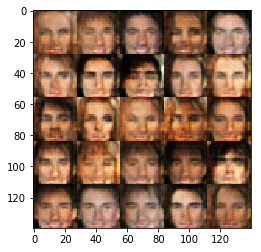

Epoch 1/1... Discriminator Loss: 2.1283... Generator Loss: 0.2889
Epoch 1/1... Discriminator Loss: 1.9864... Generator Loss: 0.3520
Epoch 1/1... Discriminator Loss: 1.8633... Generator Loss: 0.3859
Epoch 1/1... Discriminator Loss: 2.1632... Generator Loss: 0.2820
Epoch 1/1... Discriminator Loss: 1.8131... Generator Loss: 0.4328
Epoch 1/1... Discriminator Loss: 2.0564... Generator Loss: 0.3395
Epoch 1/1... Discriminator Loss: 2.0106... Generator Loss: 0.3504
Epoch 1/1... Discriminator Loss: 1.9882... Generator Loss: 0.3281
Epoch 1/1... Discriminator Loss: 2.0055... Generator Loss: 0.3559
Epoch 1/1... Discriminator Loss: 1.7921... Generator Loss: 0.4037


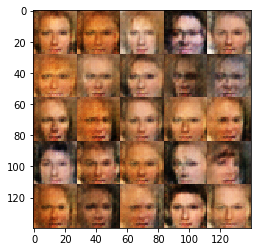

Epoch 1/1... Discriminator Loss: 1.8349... Generator Loss: 0.3774
Epoch 1/1... Discriminator Loss: 1.8935... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 1.9833... Generator Loss: 0.3270
Epoch 1/1... Discriminator Loss: 2.0721... Generator Loss: 0.3297
Epoch 1/1... Discriminator Loss: 1.9523... Generator Loss: 0.3304
Epoch 1/1... Discriminator Loss: 1.9423... Generator Loss: 0.3283
Epoch 1/1... Discriminator Loss: 1.7930... Generator Loss: 0.4341
Epoch 1/1... Discriminator Loss: 2.0040... Generator Loss: 0.3324
Epoch 1/1... Discriminator Loss: 1.9108... Generator Loss: 0.4042
Epoch 1/1... Discriminator Loss: 1.8300... Generator Loss: 0.3822


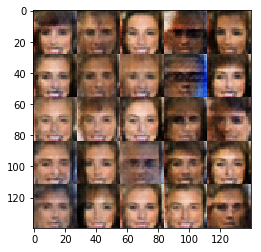

Epoch 1/1... Discriminator Loss: 2.0960... Generator Loss: 0.2483
Epoch 1/1... Discriminator Loss: 1.7869... Generator Loss: 0.5182
Epoch 1/1... Discriminator Loss: 1.9083... Generator Loss: 0.4976
Epoch 1/1... Discriminator Loss: 1.9300... Generator Loss: 0.3658
Epoch 1/1... Discriminator Loss: 1.9634... Generator Loss: 0.3371
Epoch 1/1... Discriminator Loss: 1.9571... Generator Loss: 0.4044
Epoch 1/1... Discriminator Loss: 1.8288... Generator Loss: 0.4119
Epoch 1/1... Discriminator Loss: 2.1458... Generator Loss: 0.2757
Epoch 1/1... Discriminator Loss: 2.0291... Generator Loss: 0.3394
Epoch 1/1... Discriminator Loss: 1.8784... Generator Loss: 0.4180


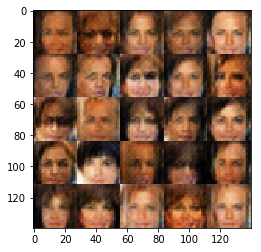

Epoch 1/1... Discriminator Loss: 1.7319... Generator Loss: 0.5207
Epoch 1/1... Discriminator Loss: 2.0099... Generator Loss: 0.3595
Epoch 1/1... Discriminator Loss: 2.2355... Generator Loss: 0.2580
Epoch 1/1... Discriminator Loss: 1.9147... Generator Loss: 0.3267
Epoch 1/1... Discriminator Loss: 2.1210... Generator Loss: 0.2898
Epoch 1/1... Discriminator Loss: 2.1693... Generator Loss: 0.2513
Epoch 1/1... Discriminator Loss: 1.8982... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 2.0642... Generator Loss: 0.2617
Epoch 1/1... Discriminator Loss: 2.1635... Generator Loss: 0.3033
Epoch 1/1... Discriminator Loss: 1.8270... Generator Loss: 0.4441


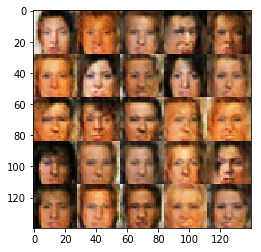

Epoch 1/1... Discriminator Loss: 1.9540... Generator Loss: 0.4418
Epoch 1/1... Discriminator Loss: 1.9992... Generator Loss: 0.3081
Epoch 1/1... Discriminator Loss: 2.1189... Generator Loss: 0.2657
Epoch 1/1... Discriminator Loss: 2.0256... Generator Loss: 0.3389
Epoch 1/1... Discriminator Loss: 2.0574... Generator Loss: 0.3080
Epoch 1/1... Discriminator Loss: 1.9901... Generator Loss: 0.3418
Epoch 1/1... Discriminator Loss: 2.1770... Generator Loss: 0.2769
Epoch 1/1... Discriminator Loss: 2.1844... Generator Loss: 0.2677
Epoch 1/1... Discriminator Loss: 2.1683... Generator Loss: 0.3333
Epoch 1/1... Discriminator Loss: 2.1502... Generator Loss: 0.2482


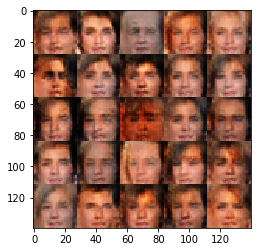

Epoch 1/1... Discriminator Loss: 2.1234... Generator Loss: 0.2607
Epoch 1/1... Discriminator Loss: 1.9244... Generator Loss: 0.5044
Epoch 1/1... Discriminator Loss: 2.1917... Generator Loss: 0.3170
Epoch 1/1... Discriminator Loss: 2.2188... Generator Loss: 0.2242
Epoch 1/1... Discriminator Loss: 2.1980... Generator Loss: 0.2367
Epoch 1/1... Discriminator Loss: 2.1045... Generator Loss: 0.3156
Epoch 1/1... Discriminator Loss: 1.9746... Generator Loss: 0.3452
Epoch 1/1... Discriminator Loss: 2.2847... Generator Loss: 0.2458
Epoch 1/1... Discriminator Loss: 2.3044... Generator Loss: 0.2506
Epoch 1/1... Discriminator Loss: 2.0667... Generator Loss: 0.3154


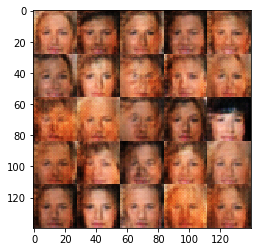

Epoch 1/1... Discriminator Loss: 2.1886... Generator Loss: 0.3103
Epoch 1/1... Discriminator Loss: 1.9627... Generator Loss: 0.3868
Epoch 1/1... Discriminator Loss: 2.1119... Generator Loss: 0.2732
Epoch 1/1... Discriminator Loss: 1.8178... Generator Loss: 0.4425
Epoch 1/1... Discriminator Loss: 2.0276... Generator Loss: 0.2785
Epoch 1/1... Discriminator Loss: 2.0939... Generator Loss: 0.3051
Epoch 1/1... Discriminator Loss: 2.0094... Generator Loss: 0.3269
Epoch 1/1... Discriminator Loss: 2.3858... Generator Loss: 0.1853
Epoch 1/1... Discriminator Loss: 2.0842... Generator Loss: 0.3320
Epoch 1/1... Discriminator Loss: 2.0614... Generator Loss: 0.3418


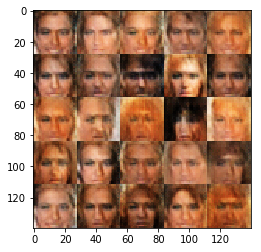

Epoch 1/1... Discriminator Loss: 2.1188... Generator Loss: 0.3235
Epoch 1/1... Discriminator Loss: 2.0545... Generator Loss: 0.2942
Epoch 1/1... Discriminator Loss: 1.9575... Generator Loss: 0.3046
Epoch 1/1... Discriminator Loss: 2.0339... Generator Loss: 0.3256
Epoch 1/1... Discriminator Loss: 2.2698... Generator Loss: 0.2235
Epoch 1/1... Discriminator Loss: 2.0550... Generator Loss: 0.3196
Epoch 1/1... Discriminator Loss: 2.2170... Generator Loss: 0.2435
Epoch 1/1... Discriminator Loss: 2.0635... Generator Loss: 0.2666
Epoch 1/1... Discriminator Loss: 2.2732... Generator Loss: 0.2846
Epoch 1/1... Discriminator Loss: 1.9784... Generator Loss: 0.3242


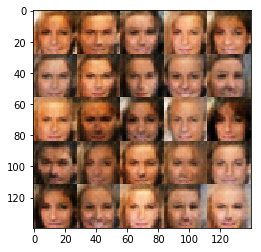

Epoch 1/1... Discriminator Loss: 2.0703... Generator Loss: 0.3127
Epoch 1/1... Discriminator Loss: 2.0776... Generator Loss: 0.3610
Epoch 1/1... Discriminator Loss: 2.1975... Generator Loss: 0.2726
Epoch 1/1... Discriminator Loss: 2.2241... Generator Loss: 0.3175
Epoch 1/1... Discriminator Loss: 2.4240... Generator Loss: 0.1627
Epoch 1/1... Discriminator Loss: 2.2299... Generator Loss: 0.2439
Epoch 1/1... Discriminator Loss: 1.9466... Generator Loss: 0.4441
Epoch 1/1... Discriminator Loss: 2.0468... Generator Loss: 0.2928
Epoch 1/1... Discriminator Loss: 2.2122... Generator Loss: 0.2584
Epoch 1/1... Discriminator Loss: 2.1280... Generator Loss: 0.2771


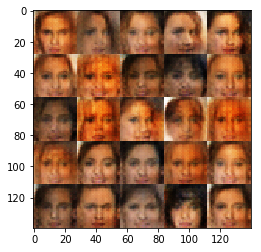

Epoch 1/1... Discriminator Loss: 2.0103... Generator Loss: 0.3059
Epoch 1/1... Discriminator Loss: 2.3228... Generator Loss: 0.2177
Epoch 1/1... Discriminator Loss: 2.4099... Generator Loss: 0.2173
Epoch 1/1... Discriminator Loss: 2.0146... Generator Loss: 0.3093
Epoch 1/1... Discriminator Loss: 2.0669... Generator Loss: 0.3171
Epoch 1/1... Discriminator Loss: 2.1634... Generator Loss: 0.2483
Epoch 1/1... Discriminator Loss: 2.0741... Generator Loss: 0.2998
Epoch 1/1... Discriminator Loss: 2.4498... Generator Loss: 0.1967
Epoch 1/1... Discriminator Loss: 2.1140... Generator Loss: 0.3542
Epoch 1/1... Discriminator Loss: 2.3447... Generator Loss: 0.2314


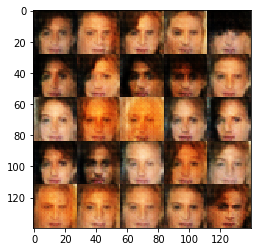

Epoch 1/1... Discriminator Loss: 1.9715... Generator Loss: 0.3426
Epoch 1/1... Discriminator Loss: 2.1202... Generator Loss: 0.3156
Epoch 1/1... Discriminator Loss: 2.0034... Generator Loss: 0.3417
Epoch 1/1... Discriminator Loss: 2.1907... Generator Loss: 0.2186
Epoch 1/1... Discriminator Loss: 2.2674... Generator Loss: 0.2016
Epoch 1/1... Discriminator Loss: 2.0352... Generator Loss: 0.3145
Epoch 1/1... Discriminator Loss: 2.4357... Generator Loss: 0.1791
Epoch 1/1... Discriminator Loss: 2.2671... Generator Loss: 0.2762
Epoch 1/1... Discriminator Loss: 2.0920... Generator Loss: 0.2741
Epoch 1/1... Discriminator Loss: 2.3305... Generator Loss: 0.2064


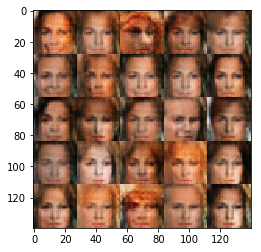

Epoch 1/1... Discriminator Loss: 2.5352... Generator Loss: 0.1491
Epoch 1/1... Discriminator Loss: 2.1447... Generator Loss: 0.3542
Epoch 1/1... Discriminator Loss: 2.2751... Generator Loss: 0.2274
Epoch 1/1... Discriminator Loss: 2.5454... Generator Loss: 0.1689
Epoch 1/1... Discriminator Loss: 2.2414... Generator Loss: 0.2309
Epoch 1/1... Discriminator Loss: 2.2214... Generator Loss: 0.2589
Epoch 1/1... Discriminator Loss: 2.2963... Generator Loss: 0.2370
Epoch 1/1... Discriminator Loss: 2.1102... Generator Loss: 0.2677
Epoch 1/1... Discriminator Loss: 2.6043... Generator Loss: 0.1372
Epoch 1/1... Discriminator Loss: 2.3219... Generator Loss: 0.1982


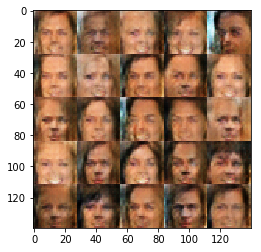

Epoch 1/1... Discriminator Loss: 2.3032... Generator Loss: 0.2022
Epoch 1/1... Discriminator Loss: 2.6731... Generator Loss: 0.1490
Epoch 1/1... Discriminator Loss: 2.2568... Generator Loss: 0.2296
Epoch 1/1... Discriminator Loss: 2.2560... Generator Loss: 0.2540
Epoch 1/1... Discriminator Loss: 2.6530... Generator Loss: 0.1490
Epoch 1/1... Discriminator Loss: 2.3085... Generator Loss: 0.2558
Epoch 1/1... Discriminator Loss: 2.3580... Generator Loss: 0.2055
Epoch 1/1... Discriminator Loss: 2.3815... Generator Loss: 0.1834
Epoch 1/1... Discriminator Loss: 2.3760... Generator Loss: 0.2338
Epoch 1/1... Discriminator Loss: 2.3234... Generator Loss: 0.2032


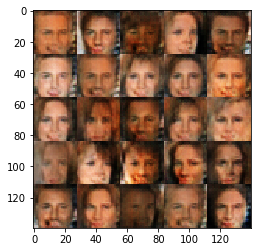

Epoch 1/1... Discriminator Loss: 2.3098... Generator Loss: 0.1972
Epoch 1/1... Discriminator Loss: 2.2763... Generator Loss: 0.2145
Epoch 1/1... Discriminator Loss: 2.5954... Generator Loss: 0.2082
Epoch 1/1... Discriminator Loss: 2.2676... Generator Loss: 0.3045
Epoch 1/1... Discriminator Loss: 2.4405... Generator Loss: 0.1839
Epoch 1/1... Discriminator Loss: 2.5765... Generator Loss: 0.1589
Epoch 1/1... Discriminator Loss: 2.1855... Generator Loss: 0.2461
Epoch 1/1... Discriminator Loss: 2.2942... Generator Loss: 0.2403
Epoch 1/1... Discriminator Loss: 2.6472... Generator Loss: 0.1493
Epoch 1/1... Discriminator Loss: 2.1044... Generator Loss: 0.3167


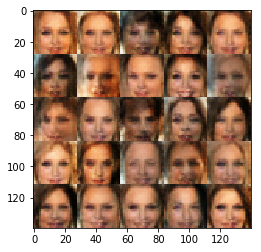

Epoch 1/1... Discriminator Loss: 2.3291... Generator Loss: 0.3165
Epoch 1/1... Discriminator Loss: 2.4545... Generator Loss: 0.2088
Epoch 1/1... Discriminator Loss: 2.0747... Generator Loss: 0.3177
Epoch 1/1... Discriminator Loss: 2.4754... Generator Loss: 0.1766
Epoch 1/1... Discriminator Loss: 2.1167... Generator Loss: 0.3070
Epoch 1/1... Discriminator Loss: 2.0438... Generator Loss: 0.2602
Epoch 1/1... Discriminator Loss: 2.2157... Generator Loss: 0.2996
Epoch 1/1... Discriminator Loss: 2.4512... Generator Loss: 0.2121
Epoch 1/1... Discriminator Loss: 2.4734... Generator Loss: 0.1673
Epoch 1/1... Discriminator Loss: 2.4150... Generator Loss: 0.1757


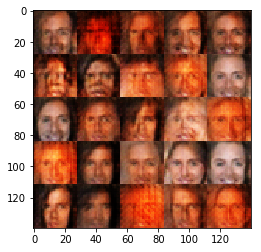

Epoch 1/1... Discriminator Loss: 2.3176... Generator Loss: 0.2076
Epoch 1/1... Discriminator Loss: 2.4759... Generator Loss: 0.1909
Epoch 1/1... Discriminator Loss: 2.2947... Generator Loss: 0.2193
Epoch 1/1... Discriminator Loss: 2.4694... Generator Loss: 0.2000
Epoch 1/1... Discriminator Loss: 2.4815... Generator Loss: 0.1900
Epoch 1/1... Discriminator Loss: 2.4599... Generator Loss: 0.2587
Epoch 1/1... Discriminator Loss: 2.5314... Generator Loss: 0.1553
Epoch 1/1... Discriminator Loss: 2.3272... Generator Loss: 0.2025
Epoch 1/1... Discriminator Loss: 2.3915... Generator Loss: 0.1877
Epoch 1/1... Discriminator Loss: 2.2025... Generator Loss: 0.2321


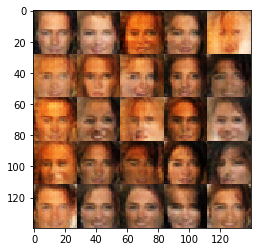

Epoch 1/1... Discriminator Loss: 2.2143... Generator Loss: 0.2680
Epoch 1/1... Discriminator Loss: 2.4531... Generator Loss: 0.1835
Epoch 1/1... Discriminator Loss: 2.3974... Generator Loss: 0.1882
Epoch 1/1... Discriminator Loss: 2.0214... Generator Loss: 0.3605
Epoch 1/1... Discriminator Loss: 2.4143... Generator Loss: 0.2053
Epoch 1/1... Discriminator Loss: 2.5821... Generator Loss: 0.1536
Epoch 1/1... Discriminator Loss: 2.5642... Generator Loss: 0.1479
Epoch 1/1... Discriminator Loss: 2.1875... Generator Loss: 0.3281
Epoch 1/1... Discriminator Loss: 2.3499... Generator Loss: 0.1789
Epoch 1/1... Discriminator Loss: 2.3706... Generator Loss: 0.2178


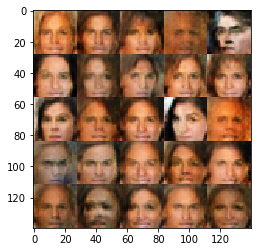

Epoch 1/1... Discriminator Loss: 2.2826... Generator Loss: 0.2107
Epoch 1/1... Discriminator Loss: 2.3699... Generator Loss: 0.2296
Epoch 1/1... Discriminator Loss: 2.4098... Generator Loss: 0.1818
Epoch 1/1... Discriminator Loss: 2.2840... Generator Loss: 0.2629
Epoch 1/1... Discriminator Loss: 2.1662... Generator Loss: 0.3285
Epoch 1/1... Discriminator Loss: 2.3677... Generator Loss: 0.1880
Epoch 1/1... Discriminator Loss: 2.4583... Generator Loss: 0.1781
Epoch 1/1... Discriminator Loss: 2.3921... Generator Loss: 0.1714
Epoch 1/1... Discriminator Loss: 2.1914... Generator Loss: 0.4489
Epoch 1/1... Discriminator Loss: 2.4761... Generator Loss: 0.1592


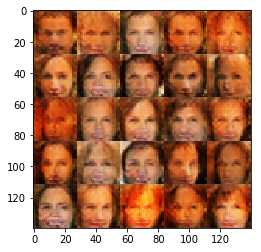

Epoch 1/1... Discriminator Loss: 2.4360... Generator Loss: 0.1913
Epoch 1/1... Discriminator Loss: 2.6672... Generator Loss: 0.1309
Epoch 1/1... Discriminator Loss: 2.2396... Generator Loss: 0.3156
Epoch 1/1... Discriminator Loss: 2.2313... Generator Loss: 0.3049
Epoch 1/1... Discriminator Loss: 2.4680... Generator Loss: 0.1729
Epoch 1/1... Discriminator Loss: 2.8175... Generator Loss: 0.1235
Epoch 1/1... Discriminator Loss: 2.3553... Generator Loss: 0.2042
Epoch 1/1... Discriminator Loss: 2.3866... Generator Loss: 0.1728
Epoch 1/1... Discriminator Loss: 2.5912... Generator Loss: 0.1623
Epoch 1/1... Discriminator Loss: 2.5916... Generator Loss: 0.1891


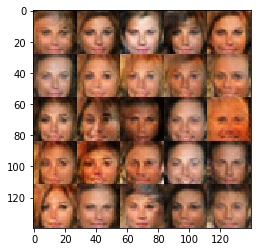

Epoch 1/1... Discriminator Loss: 2.7938... Generator Loss: 0.1308
Epoch 1/1... Discriminator Loss: 2.8133... Generator Loss: 0.1343
Epoch 1/1... Discriminator Loss: 2.5243... Generator Loss: 0.2022
Epoch 1/1... Discriminator Loss: 2.5501... Generator Loss: 0.1532
Epoch 1/1... Discriminator Loss: 2.6221... Generator Loss: 0.1512
Epoch 1/1... Discriminator Loss: 2.2519... Generator Loss: 0.2129
Epoch 1/1... Discriminator Loss: 2.4409... Generator Loss: 0.2721
Epoch 1/1... Discriminator Loss: 2.4785... Generator Loss: 0.1933
Epoch 1/1... Discriminator Loss: 2.4895... Generator Loss: 0.2147
Epoch 1/1... Discriminator Loss: 2.4185... Generator Loss: 0.2256


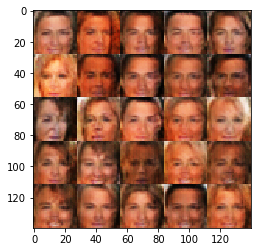

Epoch 1/1... Discriminator Loss: 2.5999... Generator Loss: 0.1667
Epoch 1/1... Discriminator Loss: 2.4168... Generator Loss: 0.1894
Epoch 1/1... Discriminator Loss: 2.6615... Generator Loss: 0.1448
Epoch 1/1... Discriminator Loss: 2.3772... Generator Loss: 0.2384
Epoch 1/1... Discriminator Loss: 2.5744... Generator Loss: 0.1677
Epoch 1/1... Discriminator Loss: 2.3301... Generator Loss: 0.2732
Epoch 1/1... Discriminator Loss: 2.2232... Generator Loss: 0.2908
Epoch 1/1... Discriminator Loss: 2.7205... Generator Loss: 0.1427
Epoch 1/1... Discriminator Loss: 2.6192... Generator Loss: 0.1287
Epoch 1/1... Discriminator Loss: 2.6961... Generator Loss: 0.1257


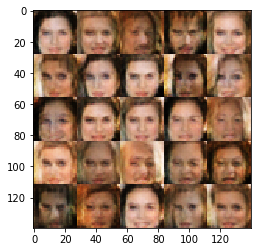

Epoch 1/1... Discriminator Loss: 2.6944... Generator Loss: 0.1426
Epoch 1/1... Discriminator Loss: 2.5678... Generator Loss: 0.1505
Epoch 1/1... Discriminator Loss: 2.6347... Generator Loss: 0.1491
Epoch 1/1... Discriminator Loss: 2.8984... Generator Loss: 0.1013
Epoch 1/1... Discriminator Loss: 2.3418... Generator Loss: 0.2346
Epoch 1/1... Discriminator Loss: 2.3905... Generator Loss: 0.1909
Epoch 1/1... Discriminator Loss: 2.8355... Generator Loss: 0.1081
Epoch 1/1... Discriminator Loss: 2.5777... Generator Loss: 0.1506
Epoch 1/1... Discriminator Loss: 2.4338... Generator Loss: 0.1760
Epoch 1/1... Discriminator Loss: 2.4533... Generator Loss: 0.2191


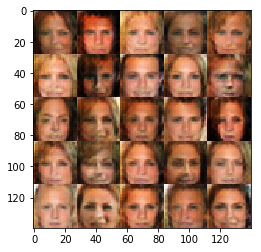

Epoch 1/1... Discriminator Loss: 2.6193... Generator Loss: 0.1351
Epoch 1/1... Discriminator Loss: 2.4870... Generator Loss: 0.2880
Epoch 1/1... Discriminator Loss: 2.7346... Generator Loss: 0.1439
Epoch 1/1... Discriminator Loss: 2.5372... Generator Loss: 0.1501
Epoch 1/1... Discriminator Loss: 2.8506... Generator Loss: 0.1223
Epoch 1/1... Discriminator Loss: 2.9760... Generator Loss: 0.0954
Epoch 1/1... Discriminator Loss: 2.5461... Generator Loss: 0.1444
Epoch 1/1... Discriminator Loss: 2.9615... Generator Loss: 0.0915
Epoch 1/1... Discriminator Loss: 2.6881... Generator Loss: 0.1276
Epoch 1/1... Discriminator Loss: 2.7427... Generator Loss: 0.1215


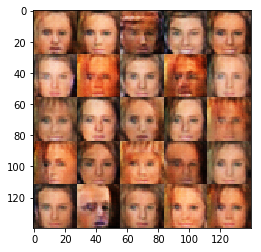

Epoch 1/1... Discriminator Loss: 2.7264... Generator Loss: 0.1347
Epoch 1/1... Discriminator Loss: 2.7169... Generator Loss: 0.1243
Epoch 1/1... Discriminator Loss: 3.1317... Generator Loss: 0.0821
Epoch 1/1... Discriminator Loss: 2.5139... Generator Loss: 0.1834
Epoch 1/1... Discriminator Loss: 2.8588... Generator Loss: 0.1411
Epoch 1/1... Discriminator Loss: 2.7273... Generator Loss: 0.1269
Epoch 1/1... Discriminator Loss: 2.6089... Generator Loss: 0.1977
Epoch 1/1... Discriminator Loss: 2.0971... Generator Loss: 0.2743
Epoch 1/1... Discriminator Loss: 2.7256... Generator Loss: 0.1377
Epoch 1/1... Discriminator Loss: 2.7795... Generator Loss: 0.1321


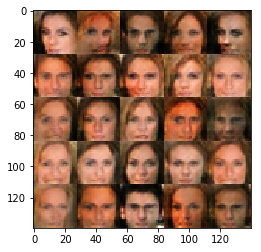

Epoch 1/1... Discriminator Loss: 2.8558... Generator Loss: 0.1295
Epoch 1/1... Discriminator Loss: 2.8517... Generator Loss: 0.1539
Epoch 1/1... Discriminator Loss: 2.4779... Generator Loss: 0.1850
Epoch 1/1... Discriminator Loss: 2.7050... Generator Loss: 0.1358
Epoch 1/1... Discriminator Loss: 3.0353... Generator Loss: 0.1052
Epoch 1/1... Discriminator Loss: 2.6824... Generator Loss: 0.1468
Epoch 1/1... Discriminator Loss: 2.5762... Generator Loss: 0.1516
Epoch 1/1... Discriminator Loss: 2.6620... Generator Loss: 0.2234
Epoch 1/1... Discriminator Loss: 2.7849... Generator Loss: 0.1142
Epoch 1/1... Discriminator Loss: 2.6714... Generator Loss: 0.1432


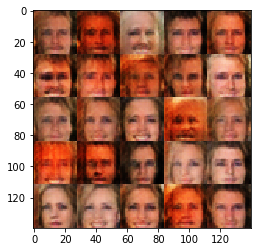

Epoch 1/1... Discriminator Loss: 2.6985... Generator Loss: 0.1589
Epoch 1/1... Discriminator Loss: 2.5295... Generator Loss: 0.1705
Epoch 1/1... Discriminator Loss: 3.2116... Generator Loss: 0.0730
Epoch 1/1... Discriminator Loss: 2.6586... Generator Loss: 0.1349
Epoch 1/1... Discriminator Loss: 2.7045... Generator Loss: 0.1395
Epoch 1/1... Discriminator Loss: 2.6295... Generator Loss: 0.1366
Epoch 1/1... Discriminator Loss: 2.4732... Generator Loss: 0.1892
Epoch 1/1... Discriminator Loss: 2.3271... Generator Loss: 0.2400
Epoch 1/1... Discriminator Loss: 2.8654... Generator Loss: 0.0948
Epoch 1/1... Discriminator Loss: 2.4449... Generator Loss: 0.1968


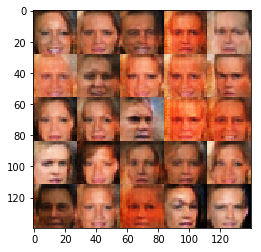

Epoch 1/1... Discriminator Loss: 2.6829... Generator Loss: 0.1884
Epoch 1/1... Discriminator Loss: 2.5949... Generator Loss: 0.1381
Epoch 1/1... Discriminator Loss: 3.0728... Generator Loss: 0.1014
Epoch 1/1... Discriminator Loss: 2.6100... Generator Loss: 0.1876
Epoch 1/1... Discriminator Loss: 2.7389... Generator Loss: 0.1253
Epoch 1/1... Discriminator Loss: 2.7736... Generator Loss: 0.1212
Epoch 1/1... Discriminator Loss: 2.5609... Generator Loss: 0.1596
Epoch 1/1... Discriminator Loss: 2.5368... Generator Loss: 0.1797
Epoch 1/1... Discriminator Loss: 2.8480... Generator Loss: 0.1256
Epoch 1/1... Discriminator Loss: 2.6008... Generator Loss: 0.1710


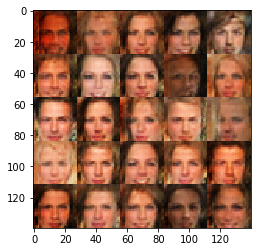

Epoch 1/1... Discriminator Loss: 2.5787... Generator Loss: 0.1468
Epoch 1/1... Discriminator Loss: 2.7767... Generator Loss: 0.1133
Epoch 1/1... Discriminator Loss: 2.7308... Generator Loss: 0.1302
Epoch 1/1... Discriminator Loss: 2.6995... Generator Loss: 0.1279
Epoch 1/1... Discriminator Loss: 2.5070... Generator Loss: 0.1631
Epoch 1/1... Discriminator Loss: 2.4453... Generator Loss: 0.1940
Epoch 1/1... Discriminator Loss: 3.1000... Generator Loss: 0.0814
Epoch 1/1... Discriminator Loss: 3.1186... Generator Loss: 0.0754
Epoch 1/1... Discriminator Loss: 2.6763... Generator Loss: 0.1683
Epoch 1/1... Discriminator Loss: 2.9176... Generator Loss: 0.1070


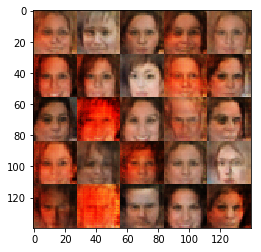

Epoch 1/1... Discriminator Loss: 2.9258... Generator Loss: 0.1003
Epoch 1/1... Discriminator Loss: 2.2730... Generator Loss: 0.2384
Epoch 1/1... Discriminator Loss: 3.0682... Generator Loss: 0.0762
Epoch 1/1... Discriminator Loss: 2.9348... Generator Loss: 0.0951
Epoch 1/1... Discriminator Loss: 2.5063... Generator Loss: 0.2272
Epoch 1/1... Discriminator Loss: 2.6775... Generator Loss: 0.1367
Epoch 1/1... Discriminator Loss: 2.5706... Generator Loss: 0.1701
Epoch 1/1... Discriminator Loss: 2.9346... Generator Loss: 0.1051
Epoch 1/1... Discriminator Loss: 2.8196... Generator Loss: 0.1241
Epoch 1/1... Discriminator Loss: 2.7786... Generator Loss: 0.1238


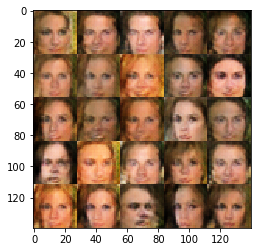

Epoch 1/1... Discriminator Loss: 2.8893... Generator Loss: 0.1074
Epoch 1/1... Discriminator Loss: 2.6535... Generator Loss: 0.1428
Epoch 1/1... Discriminator Loss: 2.9189... Generator Loss: 0.1087
Epoch 1/1... Discriminator Loss: 2.8002... Generator Loss: 0.1243
Epoch 1/1... Discriminator Loss: 2.7393... Generator Loss: 0.1166
Epoch 1/1... Discriminator Loss: 2.6239... Generator Loss: 0.1467
Epoch 1/1... Discriminator Loss: 3.1769... Generator Loss: 0.0759
Epoch 1/1... Discriminator Loss: 3.0496... Generator Loss: 0.0848
Epoch 1/1... Discriminator Loss: 2.7191... Generator Loss: 0.1198
Epoch 1/1... Discriminator Loss: 2.5931... Generator Loss: 0.1615


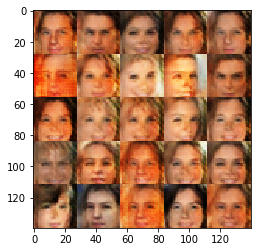

Epoch 1/1... Discriminator Loss: 2.7179... Generator Loss: 0.1326
Epoch 1/1... Discriminator Loss: 2.5581... Generator Loss: 0.2183
Epoch 1/1... Discriminator Loss: 2.7428... Generator Loss: 0.1256
Epoch 1/1... Discriminator Loss: 2.2872... Generator Loss: 0.3435
Epoch 1/1... Discriminator Loss: 2.6698... Generator Loss: 0.1419
Epoch 1/1... Discriminator Loss: 2.4420... Generator Loss: 0.1846
Epoch 1/1... Discriminator Loss: 2.4664... Generator Loss: 0.1776
Epoch 1/1... Discriminator Loss: 2.3829... Generator Loss: 0.2215
Epoch 1/1... Discriminator Loss: 3.1896... Generator Loss: 0.0712
Epoch 1/1... Discriminator Loss: 2.7488... Generator Loss: 0.1492


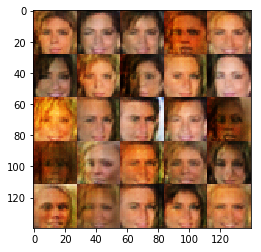

Epoch 1/1... Discriminator Loss: 2.5712... Generator Loss: 0.1589
Epoch 1/1... Discriminator Loss: 2.7227... Generator Loss: 0.1406
Epoch 1/1... Discriminator Loss: 2.8016... Generator Loss: 0.1034


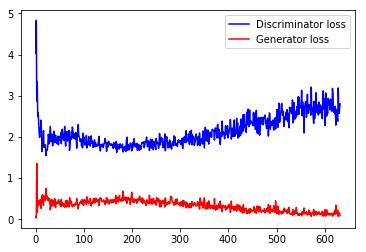

Ending --  2018-06-07 05:57:28.276492


In [33]:
import datetime

batch_size = 32
z_dim = 25088
learning_rate = 0.0005
beta1 = 0.5 # AS per review, optimal value is between 0.1 and 0.3 for good results

print("Starting -- ",  datetime.datetime.now())

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)
print("Ending -- ",  datetime.datetime.now())

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.